## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know the following things about the prospective properties:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

In [1]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Suppressing Warnings
import warnings
warnings.filterwarnings("ignore")

#setting various useful options
%matplotlib inline
pd.set_option('display.max_columns', 400)
pd.set_option('display.max_rows', 200)

# Checking version of imports to refer version specific documentation
f'NumPy version: {np.__version__} | Pandas version: {pd.__version__} | Seaborn version: {sns.__version__}'

'NumPy version: 1.20.3 | Pandas version: 1.3.4 | Seaborn version: 0.11.2'

In [2]:
# Function for plotting displot(kde) numerical columns
def numerical_column_plotting(i, x_col):
    plt.figure(num=i,figsize=(20,10))
    sns.displot(data=df, x=x_col, kde=True)
    plt.show()

In [3]:
# Function for plotting joint plot on numerical columns
def numerical_column_plotting2(i, x_col, y_col):
    plt.figure(num=i,figsize=(20,10))
    sns.jointplot(x=x_col, y=y_col, data=df[[x_col,y_col]])
    plt.show()

In [4]:
# Function for plotting countplot of categorical columns
def categorical_column_plotting(i, x_col):
    plt.figure(num=i,figsize=(20,10))
    sns.countplot(x=x_col,data=df)
    plt.show()

In [5]:
# Function for plotting boxplot categorical columns against target column (y_col)
def categorical_column_plotting2(i, x_col,y_col):
    plt.figure(num=i,figsize=(20,10))
    variables = df[[x_col]].nunique()
    plt.figure(figsize=(variables,variables/1.77))
    my_order = df[[x_col,y_col]].groupby(by=[x_col])[y_col].median().sort_values(ascending=True)
    sns.boxplot(x=x_col, y=y_col, data=df[[x_col,y_col]], order=my_order.index)
    plt.show()

## 1. Data Understanding

In [6]:
df = pd.read_csv("train.csv")

In [7]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [8]:
# Getting details of various aspects of the data
print(f'\nShape of the dataframe:\n{df.shape}')
print(f'\nName of columns in the dataframe:\n{df.columns}')
print(f'\nNull values in dataframe:\n{round(100*(df.isnull().sum()/len(df.index)), 2)}')
print(f'\nData type of different columns in the dataframe:\n{df.dtypes}')


Shape of the dataframe:
(1460, 81)

Name of columns in the dataframe:
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'Ga

## 2. Data Cleaning

In [9]:
#Imputing NA/none values with their proper meaning for columns as provided in the data dictionary
na_vals = {"Alley":'No alley access',"BsmtQual":'No Basement',"BsmtCond":'No Basement',
           "BsmtExposure":'No Basement',"BsmtFinType1":'No Basement',"BsmtFinType2":'No Basement',
           "FireplaceQu":'No Fireplace',"GarageType":'No Garage',"GarageFinish":'No Garage',
           "GarageQual":'No Garage',"GarageCond":'No Garage',"PoolQC":'No Pool',
           "Fence":'No Fence',"MiscFeature":'None',"MasVnrType":'None'}

In [10]:
df.fillna(value=na_vals, inplace =True)

In [11]:
# Examining the columns after imputing missing values with their proper meaning as provided in the
# data dictionary.
print(f'\nNull values in dataframe:\n{round(100*(df.isnull().sum()/len(df.index)), 2)}')


Null values in dataframe:
Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley             0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.00
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          0.00
BsmtCond          0.00
BsmtExposure      0.00
BsmtFinType1      0.00
BsmtFinSF1        0.00
BsmtFinType2      0.00
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electri

In [12]:
# checking what null values of MasVnrArea represents with respect to MasVnrType

df[df['MasVnrArea'].isnull()]['MasVnrType'].value_counts()

None    8
Name: MasVnrType, dtype: int64

In [13]:
# checking what MasVnrArea = 0.0 represents with respect to MasVnrType

df[df.MasVnrArea == 0.0]['MasVnrType'].value_counts()

None       859
BrkFace      1
Stone        1
Name: MasVnrType, dtype: int64

In [14]:
# As per data dictionary, columns MasVnrArea and MasVnrType are related as
# both represents individual property i.e Area and Type of Masonry veneer.
# Hence imputing the missing values of MasVnrArea with 0.0.

df['MasVnrArea'].fillna(0.0, inplace=True)

In [15]:
# checking what GarageYrBlt represents with respect to MasVnrType

df[df['GarageYrBlt'].isnull()]['GarageType'].value_counts()

No Garage    81
Name: GarageType, dtype: int64

In [16]:
df.GarageYrBlt.dtypes

dtype('float64')

In [17]:
# Since all of the null values in the columns GarageYrBlt are those where there is No Garage
# represented by the column GarageType. Hence, filling the null values of GarageYrBlt with 9999

In [18]:
df['GarageYrBlt'].fillna(9999, inplace=True)

In [19]:
df['Electrical'].value_counts(dropna=False)

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64

In [20]:
# Since the column Electrical has only 1 missing values so, 
# clubbing it with the Mix outlet type which also has 1 value.

df['Electrical'].fillna('Mix', inplace=True)

In [21]:
df[df.LotFrontage.isnull()].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,No Pool,No Fence,Shed,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,No alley access,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737,Unf,0,175,912,GasA,TA,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,TA,4,Typ,0,No Fireplace,Detchd,1962.0,Unf,1,352,TA,TA,Y,140,0,0,0,176,0,No Pool,No Fence,None,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,TA,TA,CBlock,TA,TA,No,BLQ,733,Unf,0,520,1253,GasA,TA,Y,SBrkr,1253,0,0,1253,1,0,1,1,2,1,TA,5,Typ,1,Fa,Attchd,1960.0,RFn,1,352,TA,TA,Y,0,213,176,0,0,0,No Pool,GdWo,None,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,No alley access,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,No Pool,No Fence,Shed,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,None,0.0,TA,Gd,CBlock,TA,TA,Mn,Rec,188,ALQ,668,204,1060,GasA,Ex,Y,SBrkr,1060,0,0,1060,1,0,1,0,3,1,Gd,6,Typ,1,TA,Attchd,1968.0,Unf,1,270,TA,TA,Y,406,90,0,0,0,0,No Pool,MnPrv,None,0,5,2010,WD,Normal,154000


In [22]:
df[df.LotFrontage.isnull()].BldgType.value_counts()

1Fam      226
TwnhsE     22
Duplex      5
Twnhs       3
2fmCon      3
Name: BldgType, dtype: int64

In [23]:
df.LotFrontage

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

## 3. EDA

In [24]:
# converting columns with year values to number of years built from hence.
df['YearBuilt'] = pd.datetime.now().year - df['YearBuilt']
df['YearRemodAdd'] = pd.datetime.now().year - df['YearRemodAdd']
df['GarageYrBlt'] = pd.datetime.now().year - df['GarageYrBlt']
df['YrSold'] = pd.datetime.now().year - df['YrSold']

In [25]:
# converting some columns from int type to object basis data dictionary
# for further analysis
df['MSSubClass'] = df['MSSubClass'].astype('object')
df['OverallQual'] = df['OverallQual'].astype('object')
df['OverallCond'] = df['OverallCond'].astype('object')
df['BsmtFullBath'] = df['BsmtFullBath'].astype('object')
df['BsmtHalfBath'] = df['BsmtHalfBath'].astype('object')
df['FullBath'] = df['FullBath'].astype('object')
df['HalfBath'] = df['HalfBath'].astype('object')
df['BedroomAbvGr'] = df['BedroomAbvGr'].astype('object')
df['KitchenAbvGr'] = df['KitchenAbvGr'].astype('object')
df['TotRmsAbvGrd'] = df['TotRmsAbvGrd'].astype('object')
df['Fireplaces'] = df['Fireplaces'].astype('object')
df['GarageCars'] = df['GarageCars'].astype('object')

In [26]:
df_categorical_features = df.select_dtypes(include=['object'])
df_categorical_features
list_categorical_features = list(df_categorical_features.columns)

In [27]:
print(list_categorical_features)

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [28]:
len(list_categorical_features)

55

In [29]:
df_numerical_features = df.select_dtypes(include=['float64','int64'])
df_numerical_features
list_numerical_features = list(df_numerical_features.columns)

In [30]:
len(list_numerical_features)

26

In [31]:
df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,50.732192,37.134247,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,-401.478767,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,14.184247,180921.195890
std,421.610009,24.284752,9981.264932,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,1836.786749,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,21.000000,1300.000000,12.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,-7977.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,12.000000,34900.000000
25%,365.750000,59.000000,7553.500000,22.000000,18.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,19.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,13.000000,129975.000000
50%,730.500000,69.000000,9478.500000,49.000000,28.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,37.500000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,14.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,68.000000,55.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,60.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,15.000000,214000.000000
90%,1314.100000,96.000000,14381.700000,97.100000,72.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,74.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,16.000000,278000.000000
95%,1387.050000,107.000000,17401.150000,106.000000,72.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,92.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,16.000000,326100.000000
99%,1445.410000,141.000000,37567.640000,122.820000,72.000000,791.280000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,3123.480000,104.820000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,16.000000,442567.010000


<Figure size 1440x720 with 0 Axes>

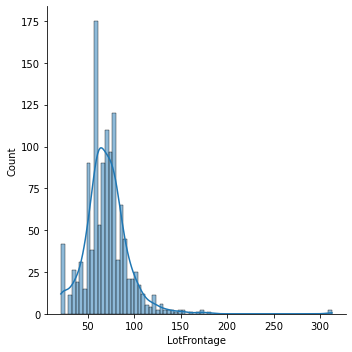

<Figure size 1440x720 with 0 Axes>

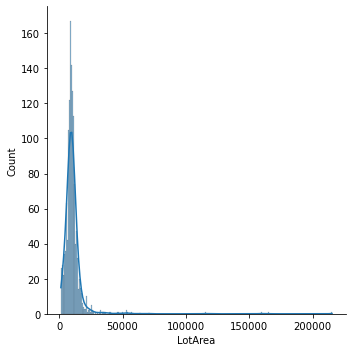

<Figure size 1440x720 with 0 Axes>

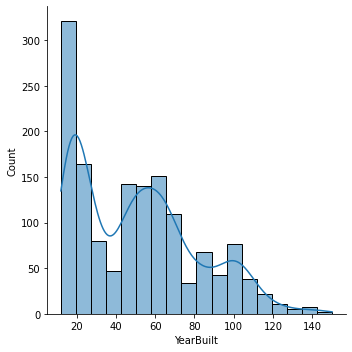

<Figure size 1440x720 with 0 Axes>

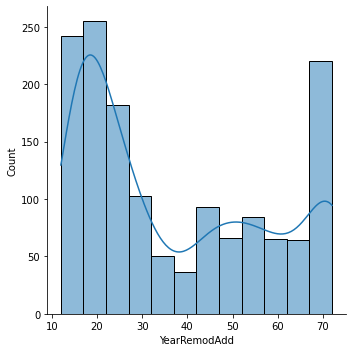

<Figure size 1440x720 with 0 Axes>

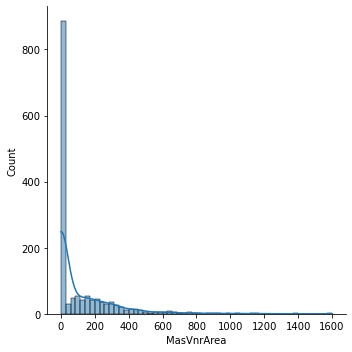

<Figure size 1440x720 with 0 Axes>

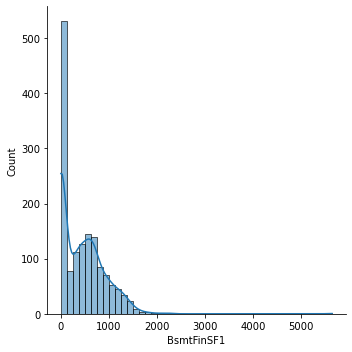

<Figure size 1440x720 with 0 Axes>

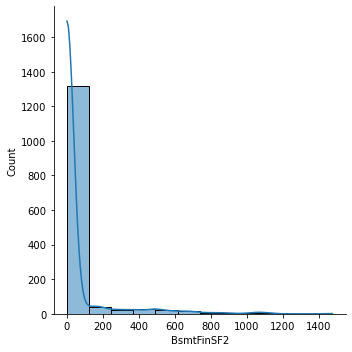

<Figure size 1440x720 with 0 Axes>

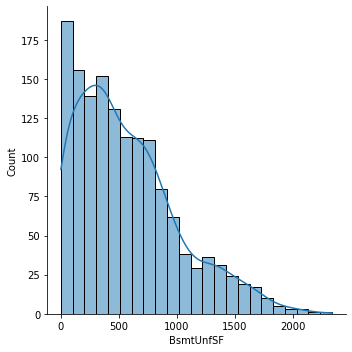

<Figure size 1440x720 with 0 Axes>

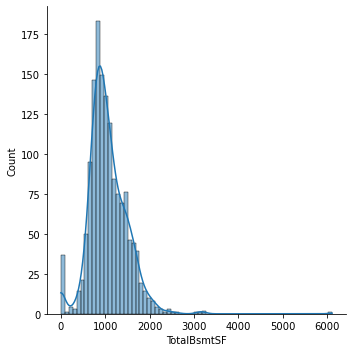

<Figure size 1440x720 with 0 Axes>

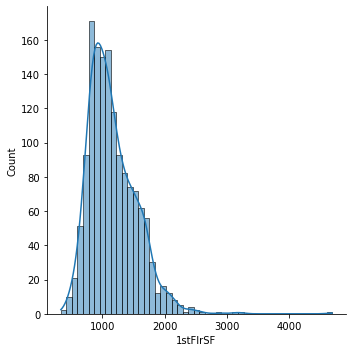

<Figure size 1440x720 with 0 Axes>

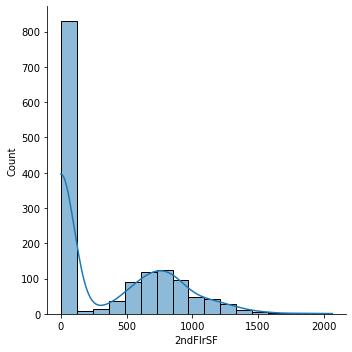

<Figure size 1440x720 with 0 Axes>

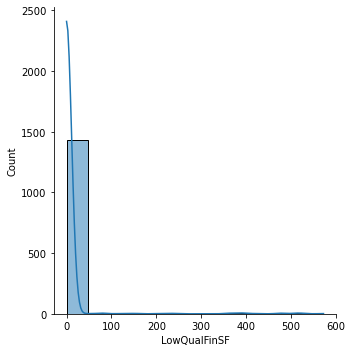

<Figure size 1440x720 with 0 Axes>

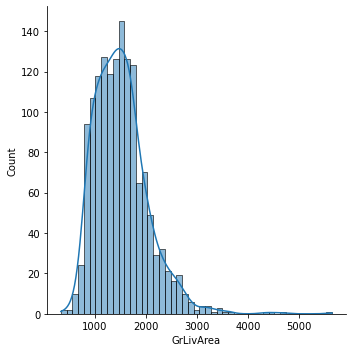

<Figure size 1440x720 with 0 Axes>

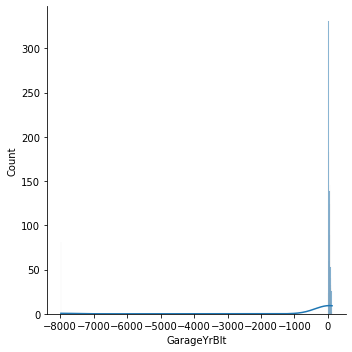

<Figure size 1440x720 with 0 Axes>

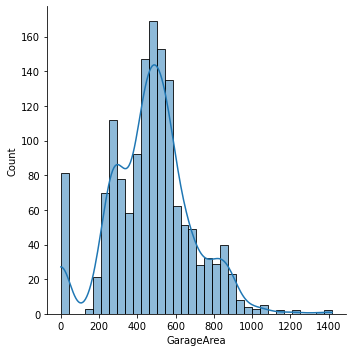

<Figure size 1440x720 with 0 Axes>

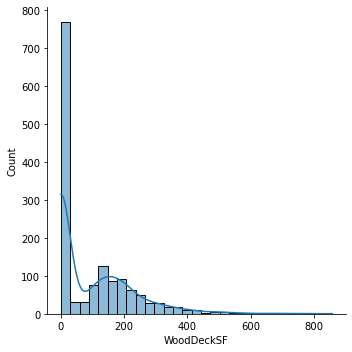

<Figure size 1440x720 with 0 Axes>

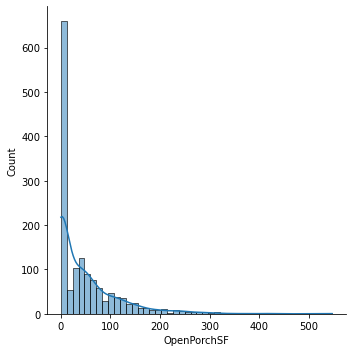

<Figure size 1440x720 with 0 Axes>

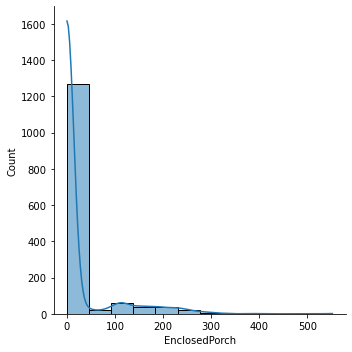

<Figure size 1440x720 with 0 Axes>

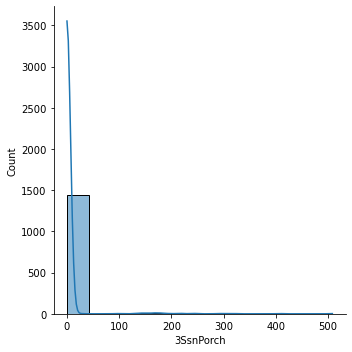

<Figure size 1440x720 with 0 Axes>

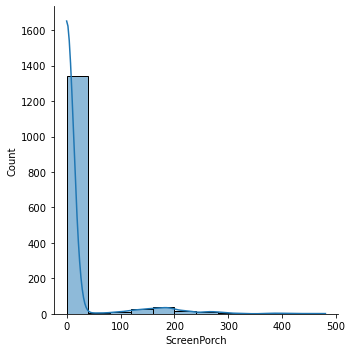

<Figure size 1440x720 with 0 Axes>

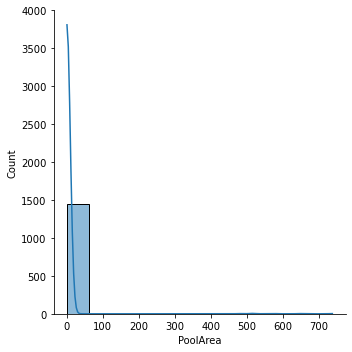

<Figure size 1440x720 with 0 Axes>

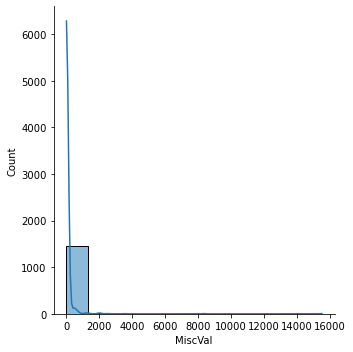

<Figure size 1440x720 with 0 Axes>

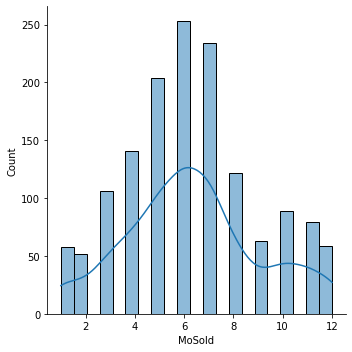

<Figure size 1440x720 with 0 Axes>

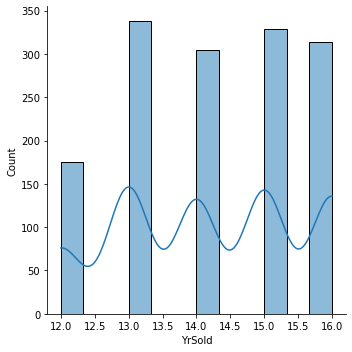

<Figure size 1440x720 with 0 Axes>

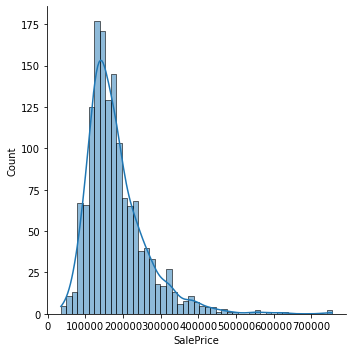

In [32]:
list_numerical_features.remove('Id')

for i, col in enumerate(list_numerical_features):
    numerical_column_plotting(i, col)

<Figure size 1440x720 with 0 Axes>

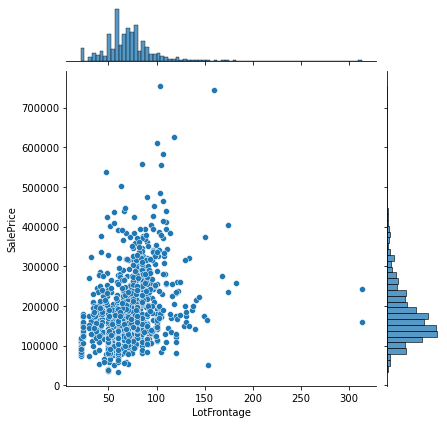

<Figure size 1440x720 with 0 Axes>

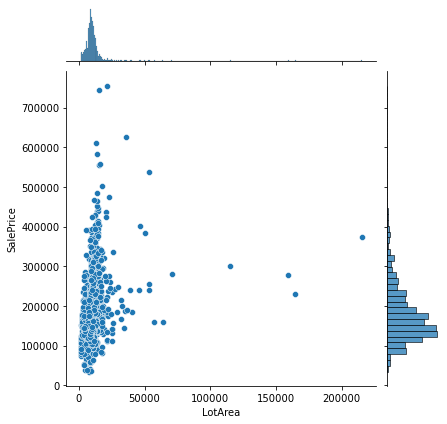

<Figure size 1440x720 with 0 Axes>

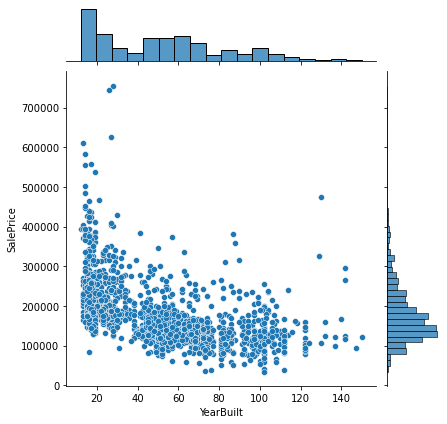

<Figure size 1440x720 with 0 Axes>

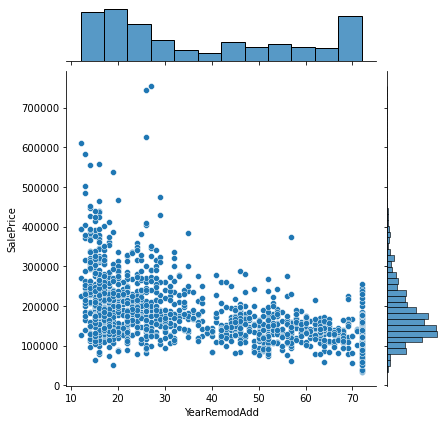

<Figure size 1440x720 with 0 Axes>

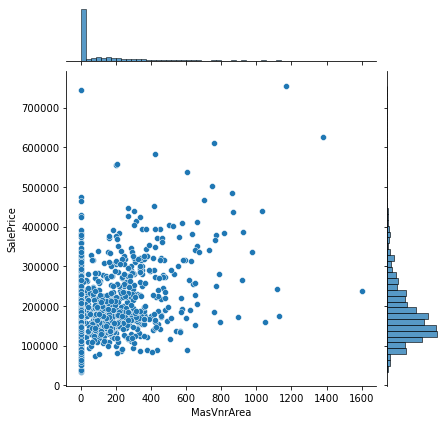

<Figure size 1440x720 with 0 Axes>

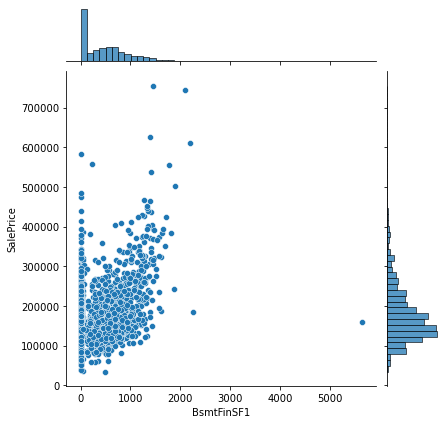

<Figure size 1440x720 with 0 Axes>

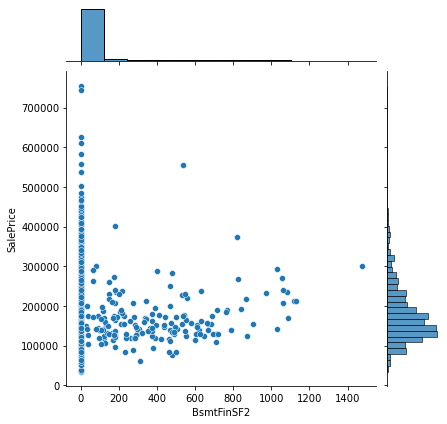

<Figure size 1440x720 with 0 Axes>

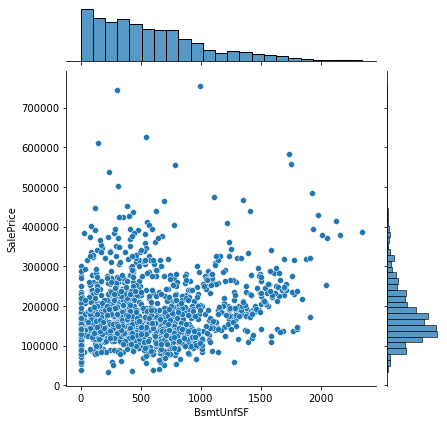

<Figure size 1440x720 with 0 Axes>

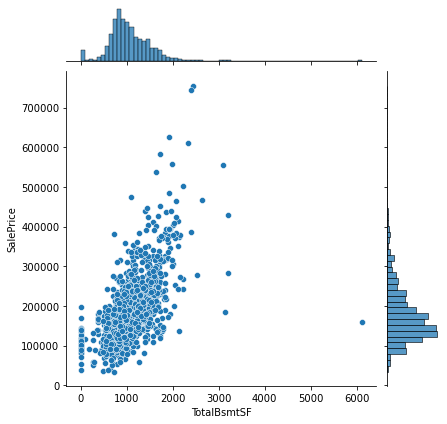

<Figure size 1440x720 with 0 Axes>

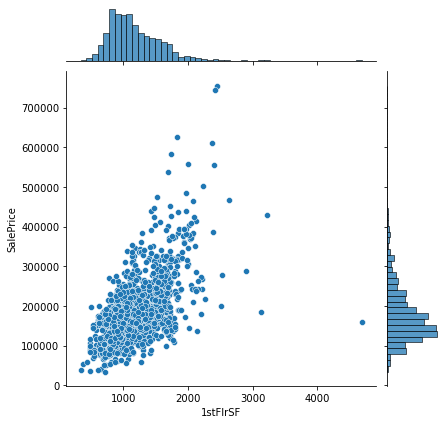

<Figure size 1440x720 with 0 Axes>

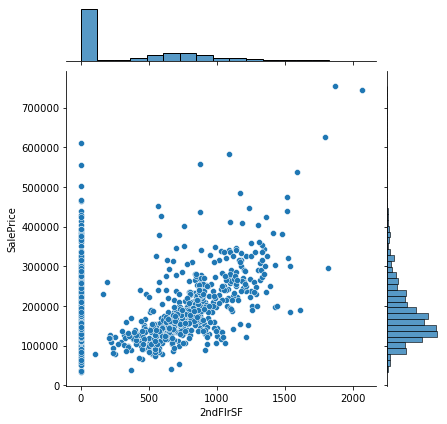

<Figure size 1440x720 with 0 Axes>

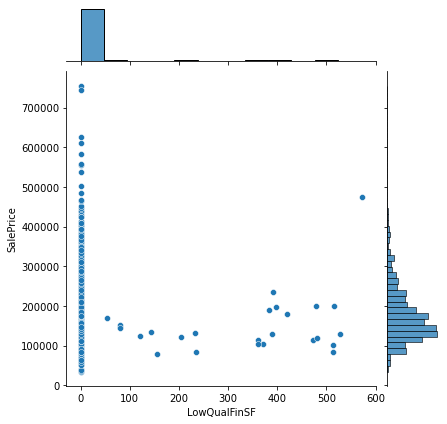

<Figure size 1440x720 with 0 Axes>

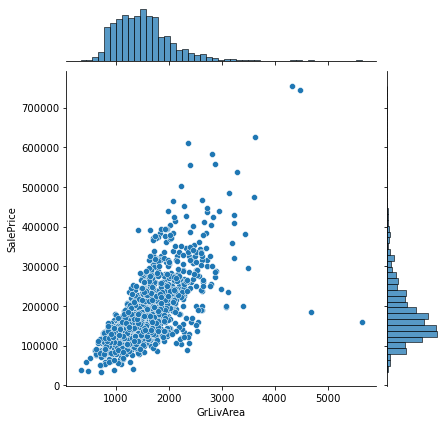

<Figure size 1440x720 with 0 Axes>

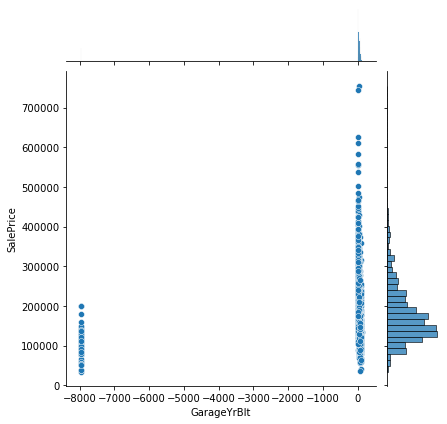

<Figure size 1440x720 with 0 Axes>

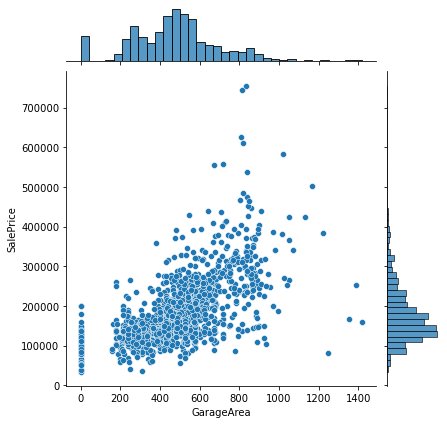

<Figure size 1440x720 with 0 Axes>

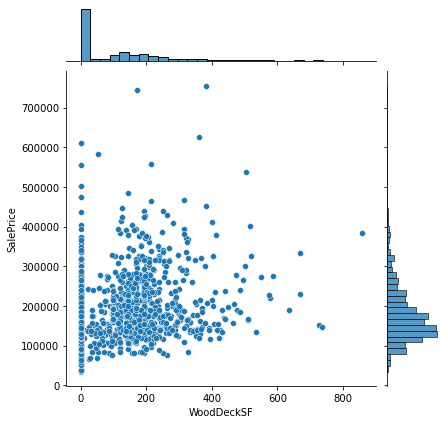

<Figure size 1440x720 with 0 Axes>

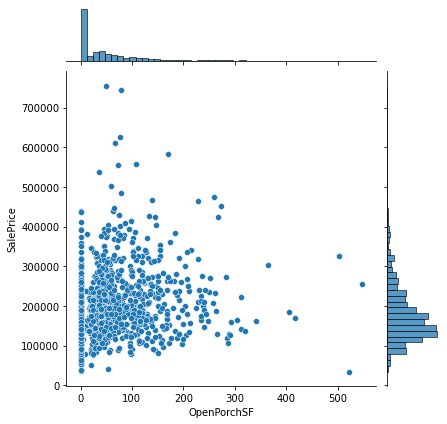

<Figure size 1440x720 with 0 Axes>

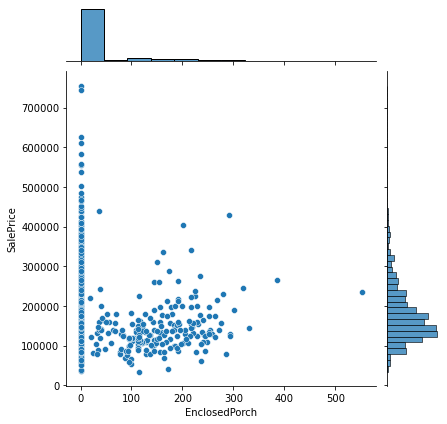

<Figure size 1440x720 with 0 Axes>

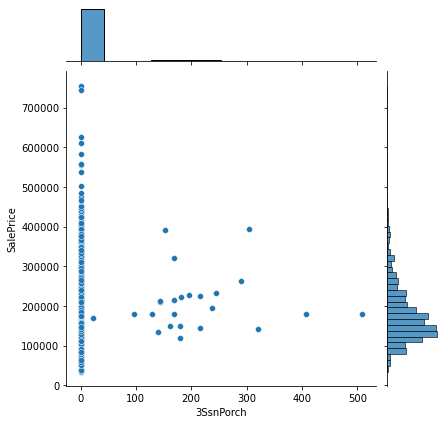

<Figure size 1440x720 with 0 Axes>

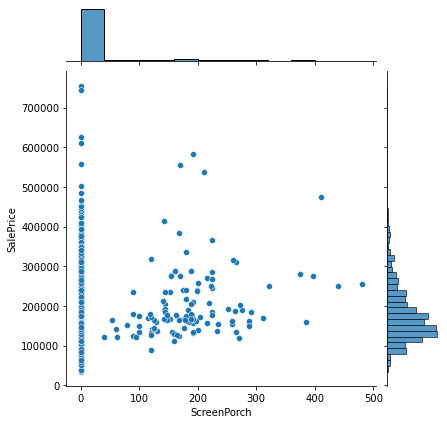

<Figure size 1440x720 with 0 Axes>

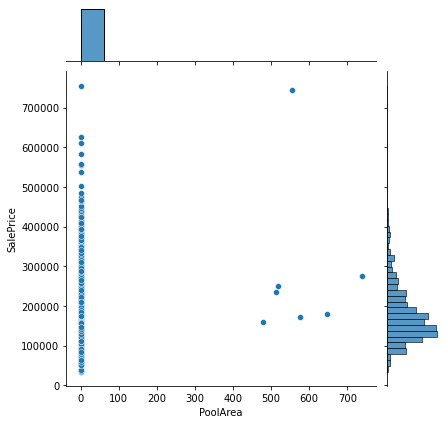

<Figure size 1440x720 with 0 Axes>

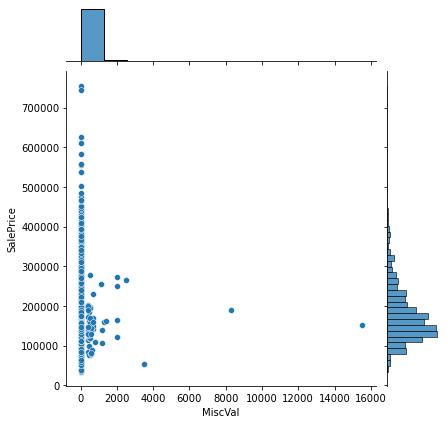

<Figure size 1440x720 with 0 Axes>

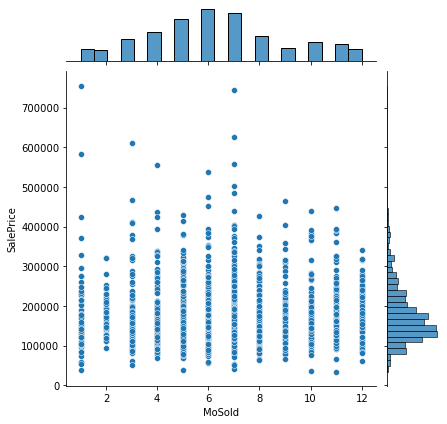

<Figure size 1440x720 with 0 Axes>

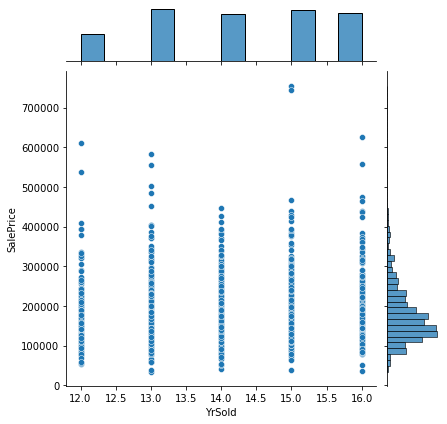

In [33]:
list_numerical_features.remove('SalePrice')

y_col = 'SalePrice'
for i, col in enumerate(list_numerical_features):
    numerical_column_plotting2(i, col, y_col)

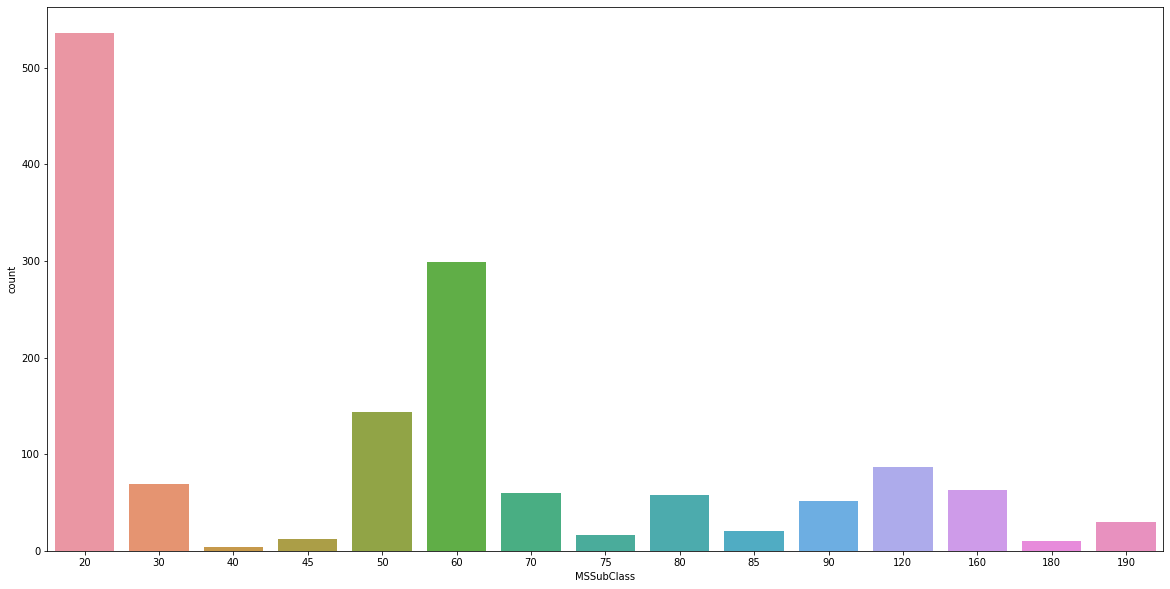

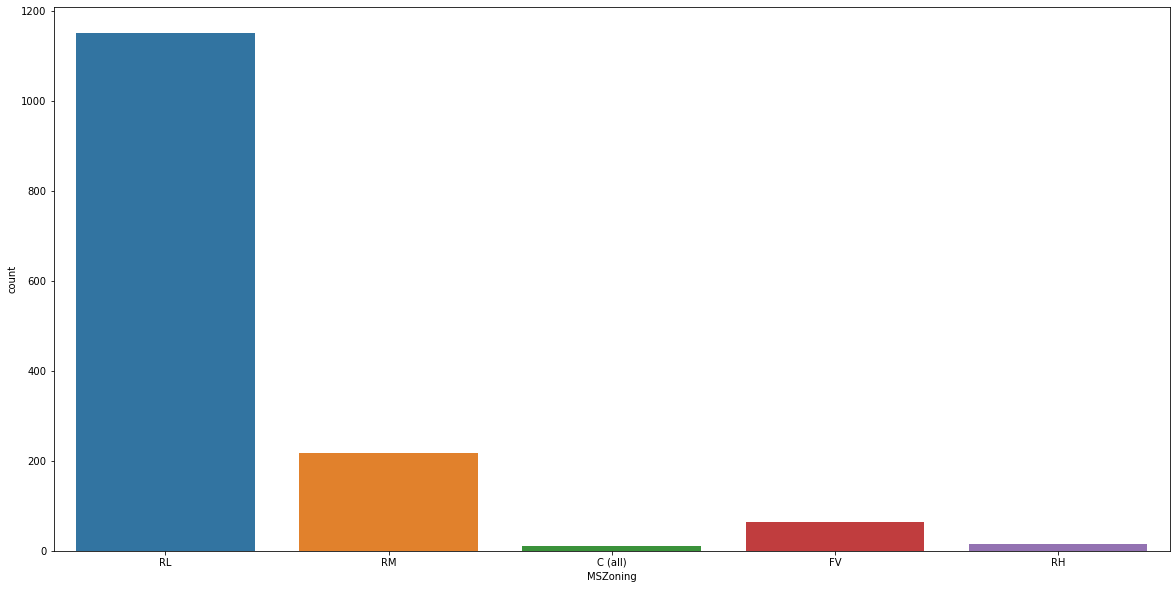

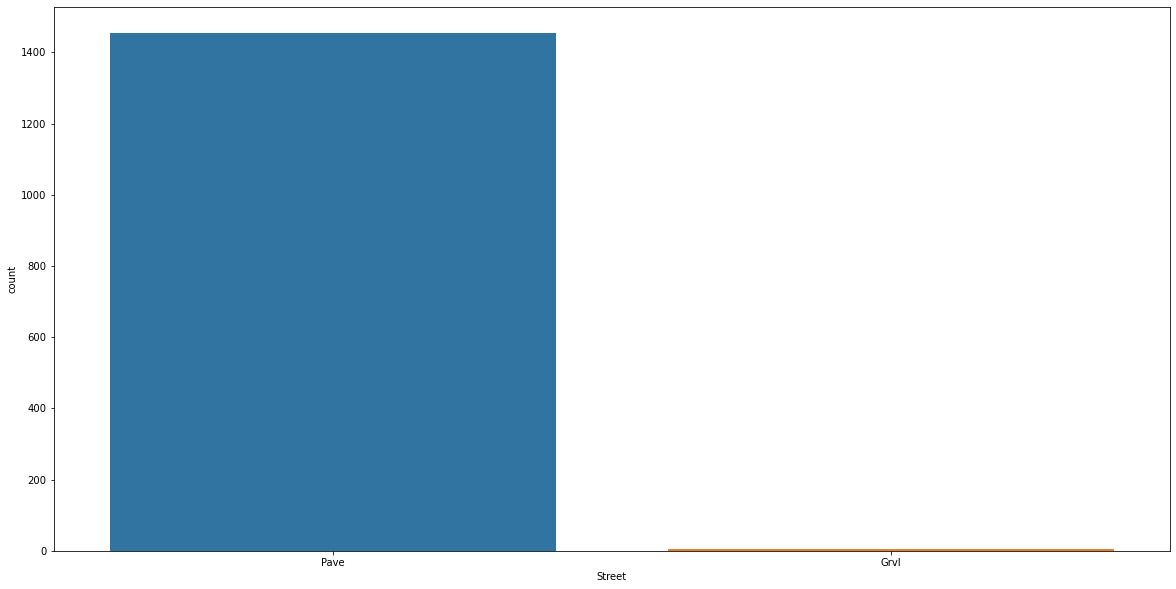

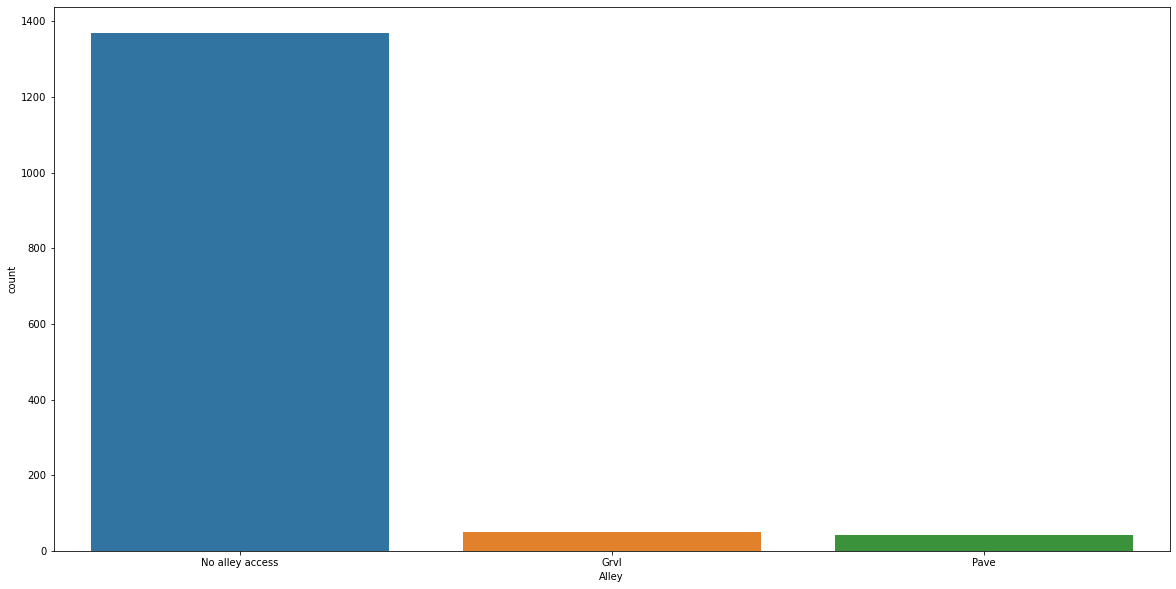

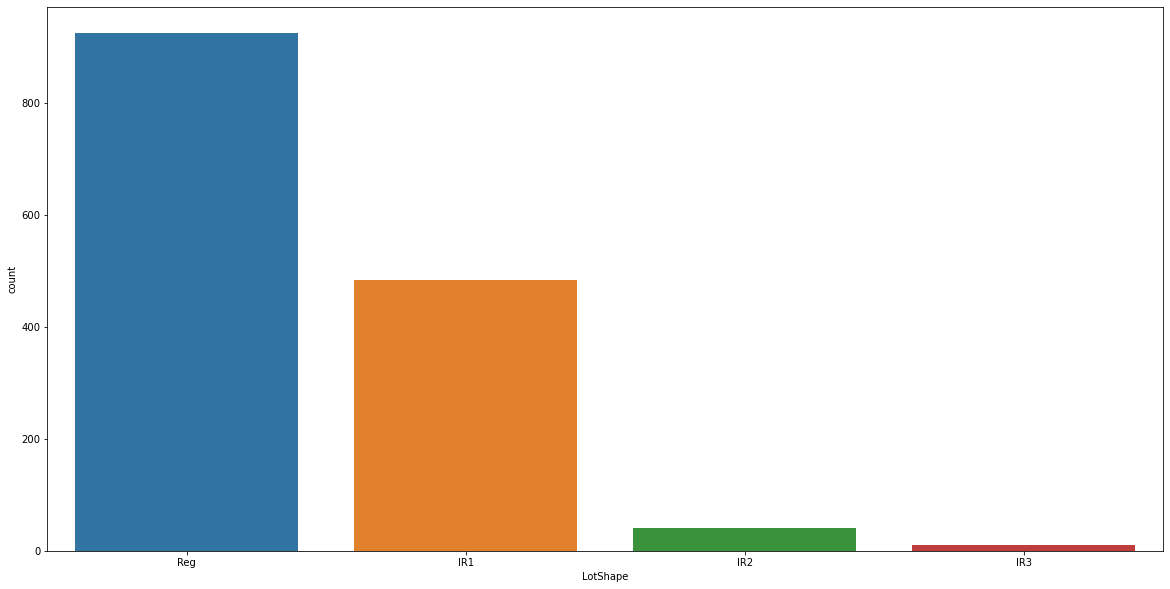

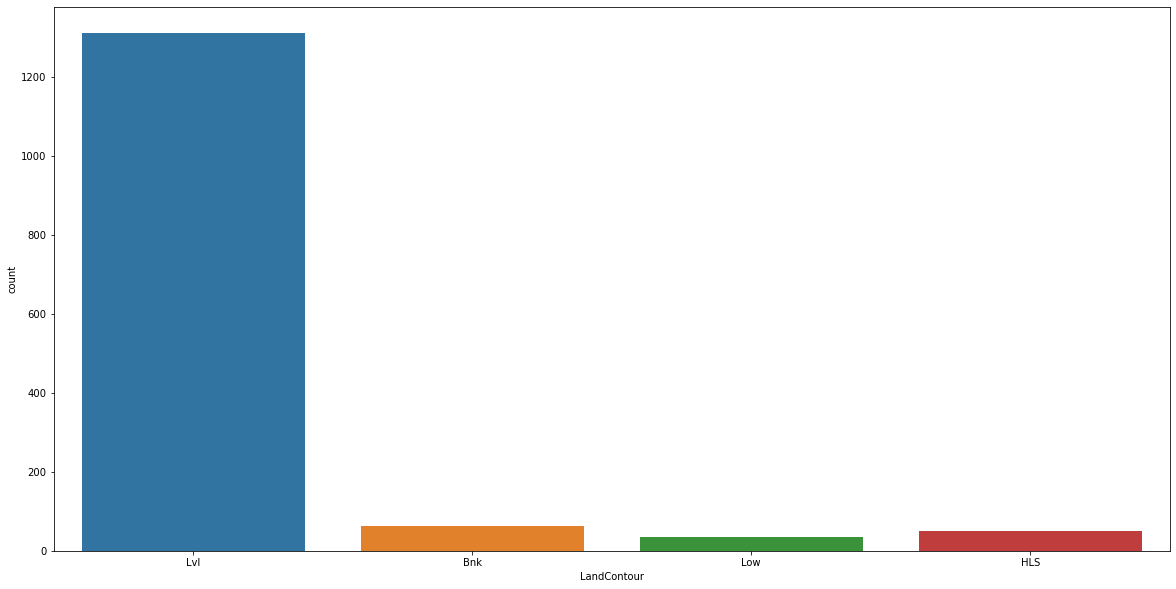

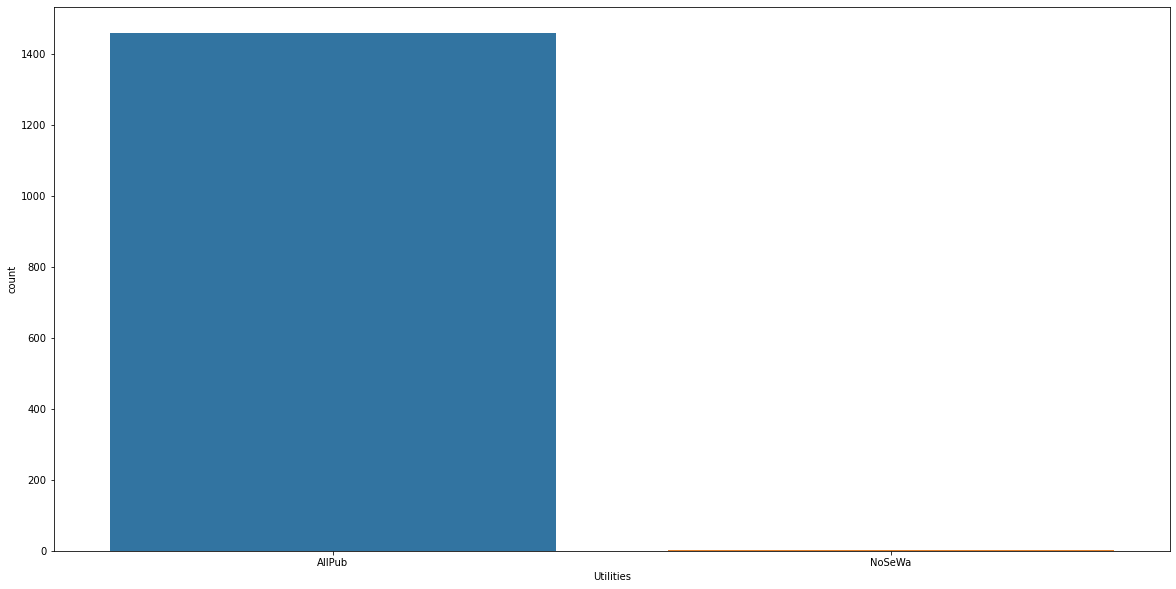

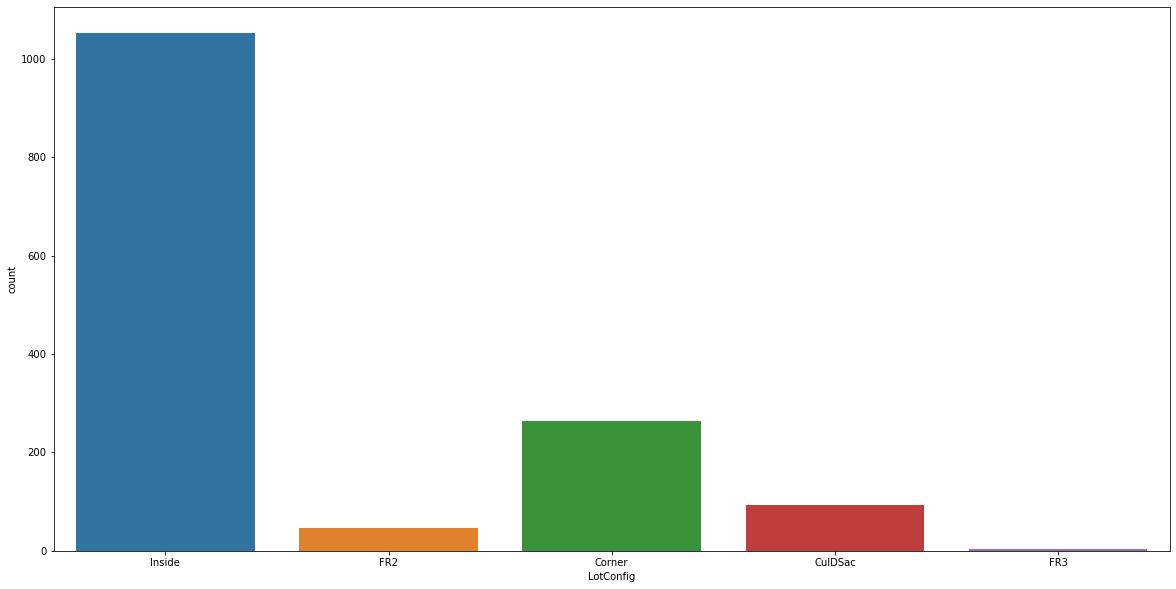

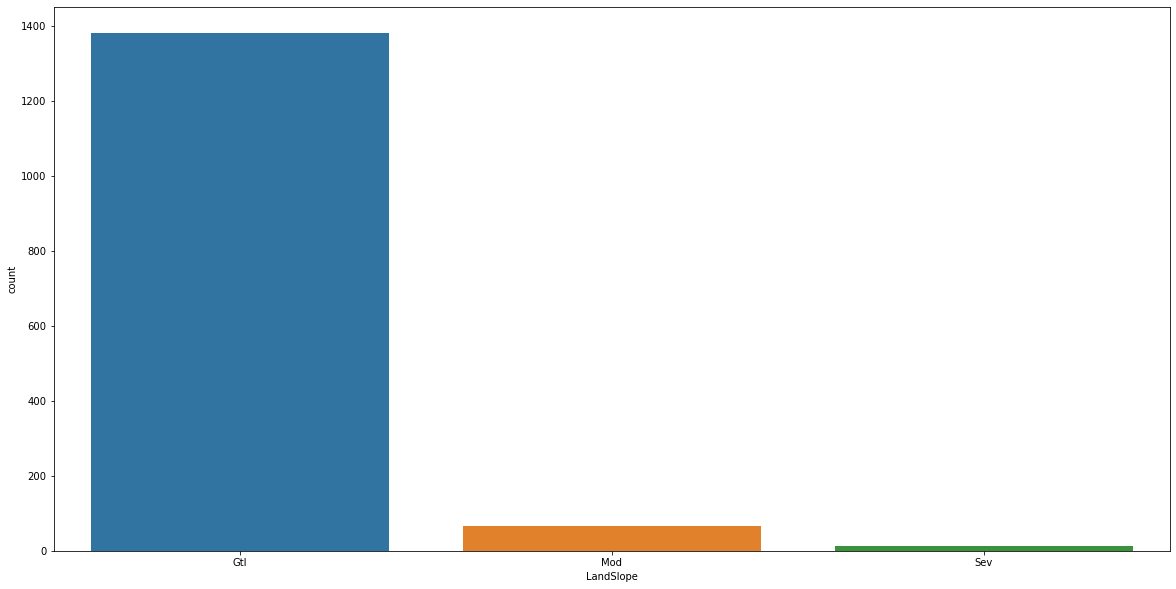

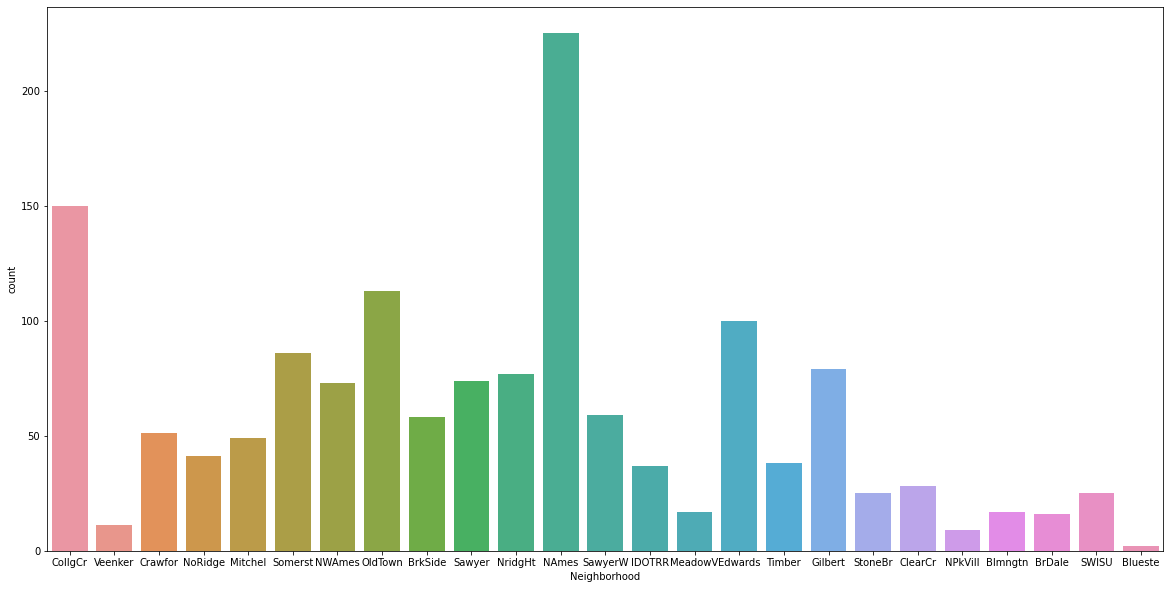

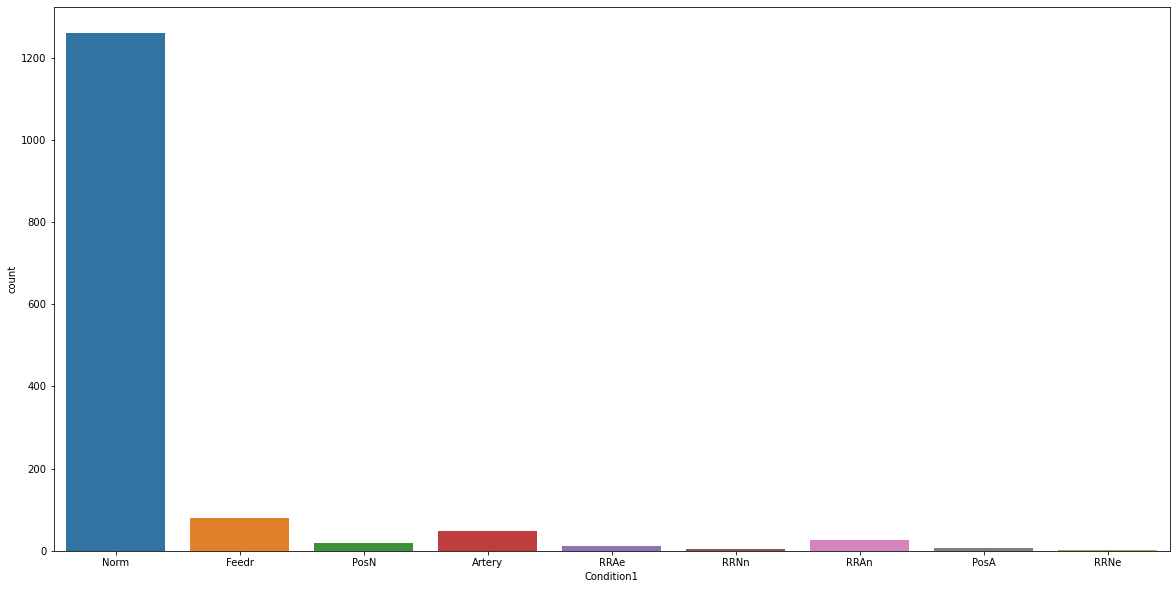

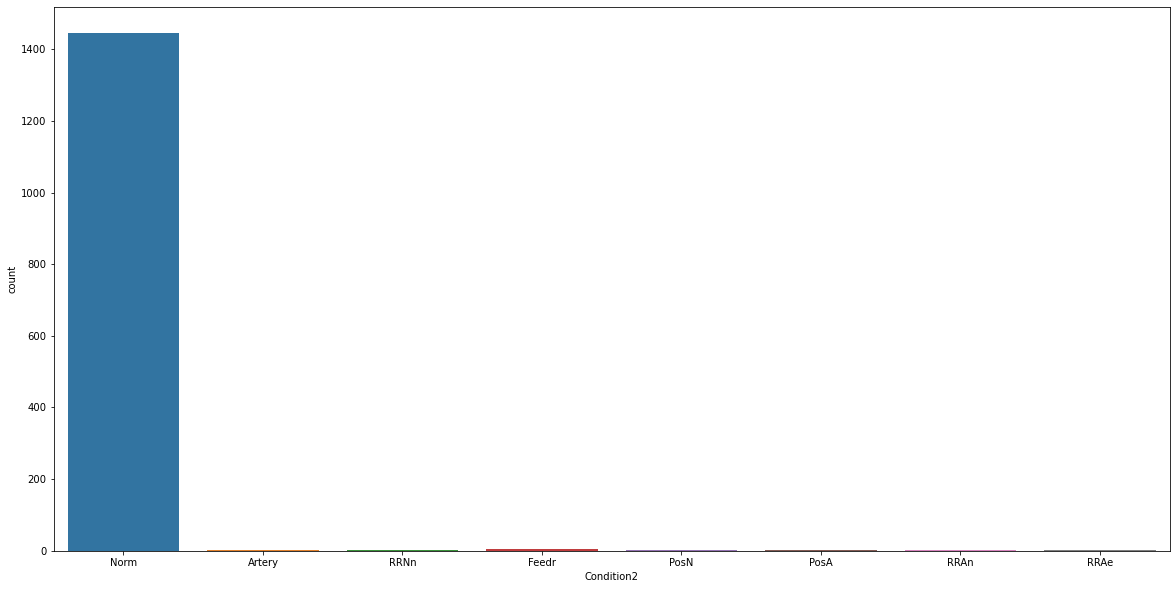

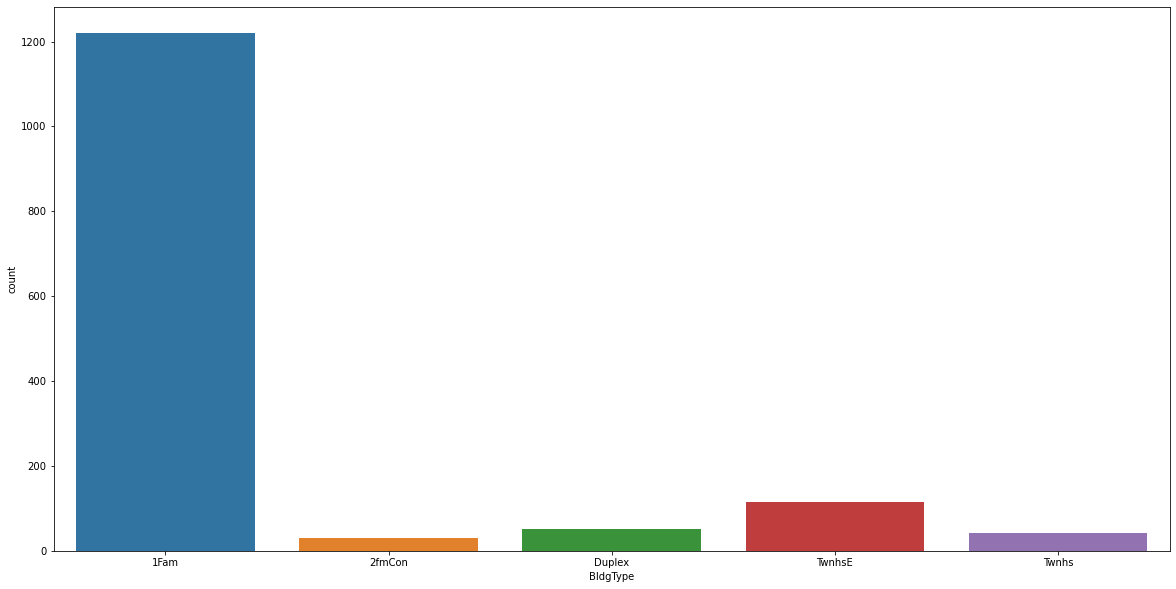

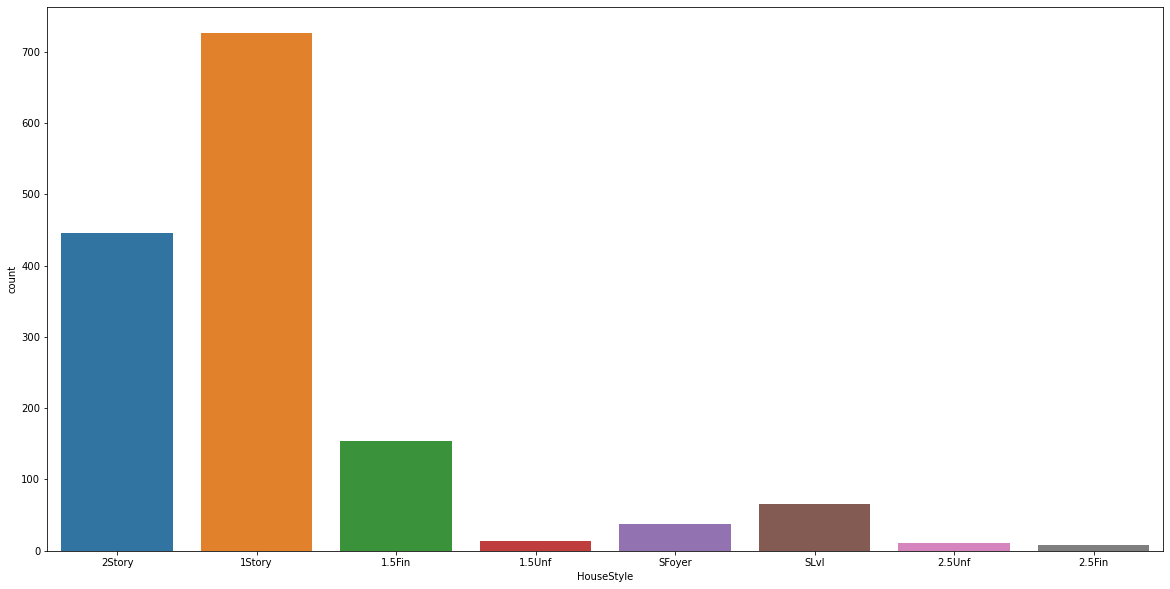

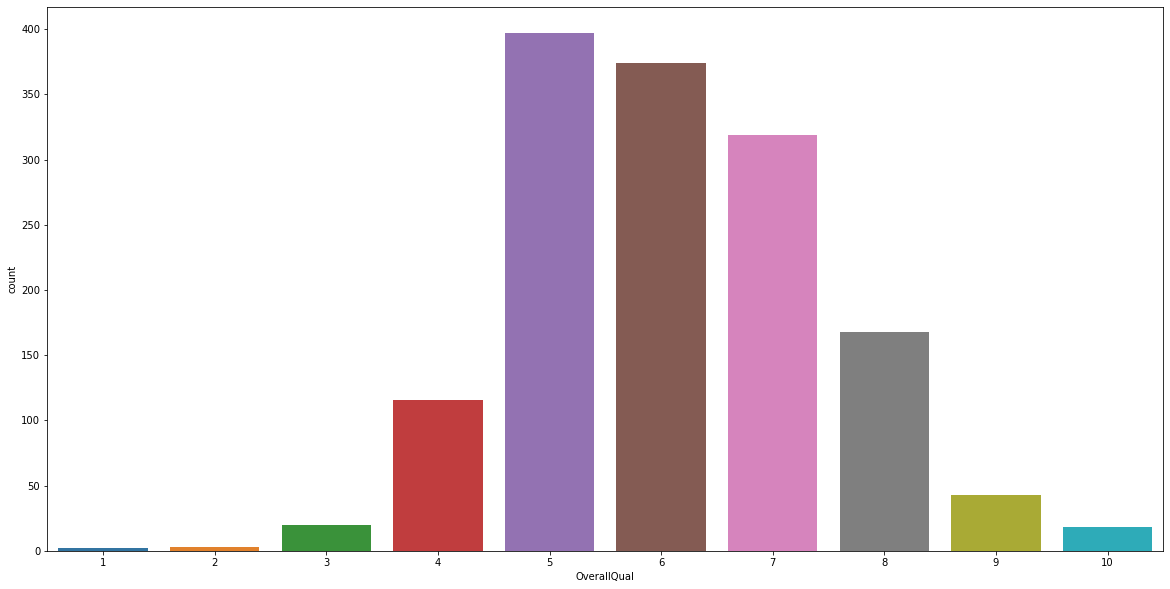

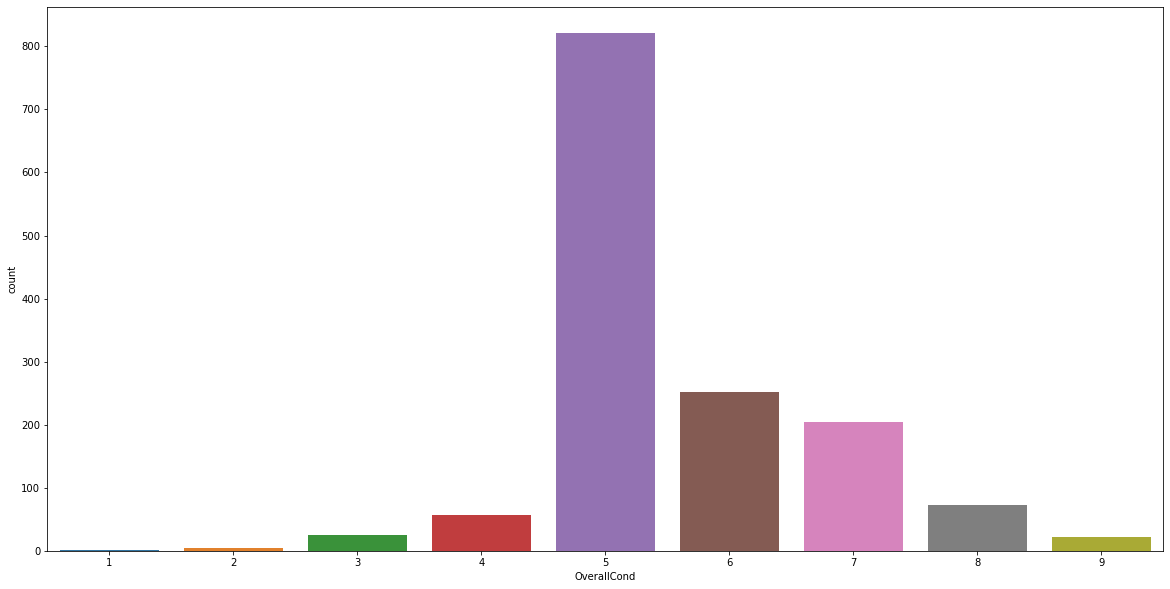

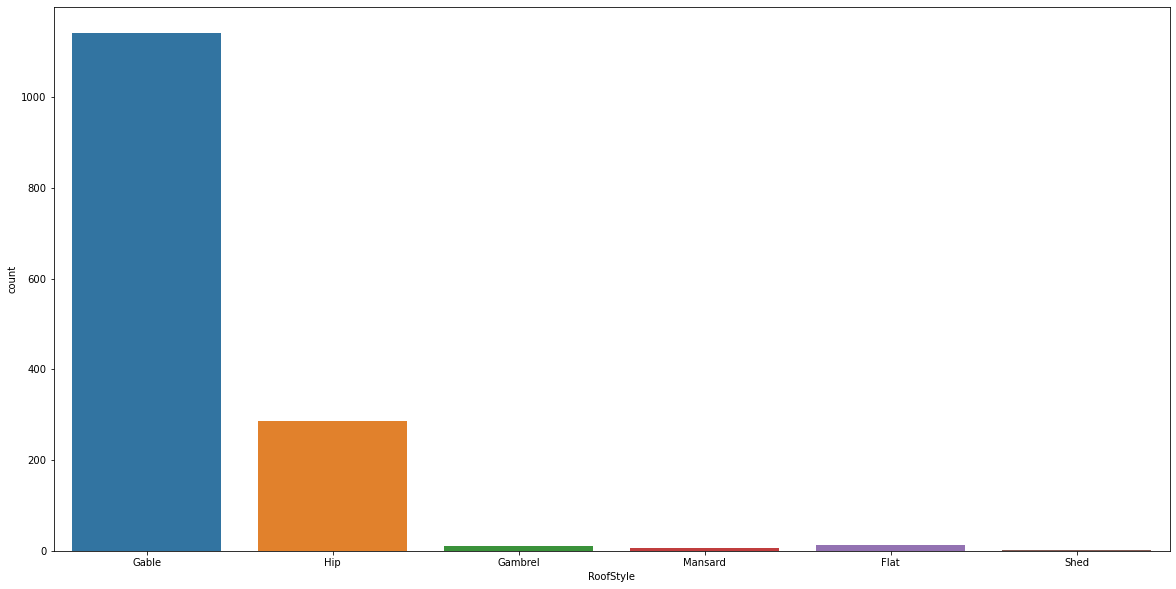

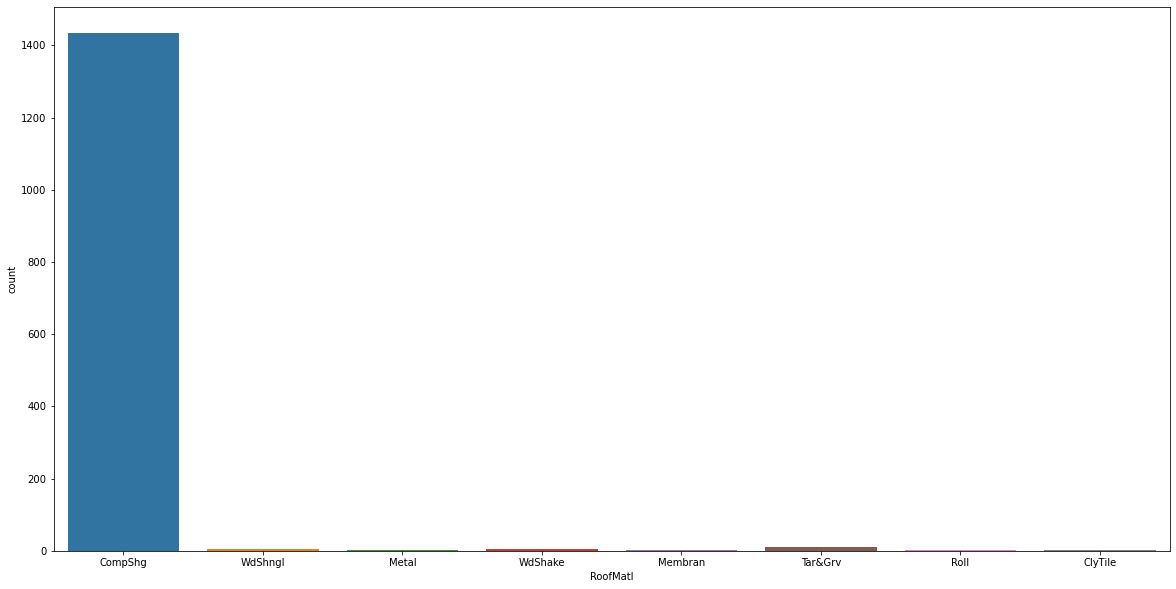

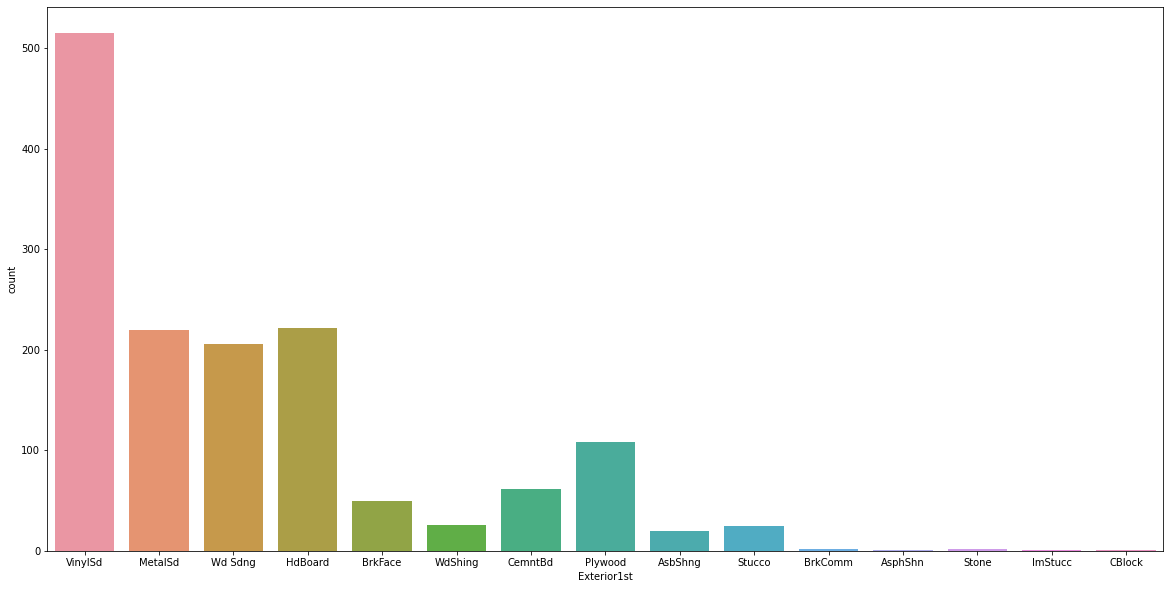

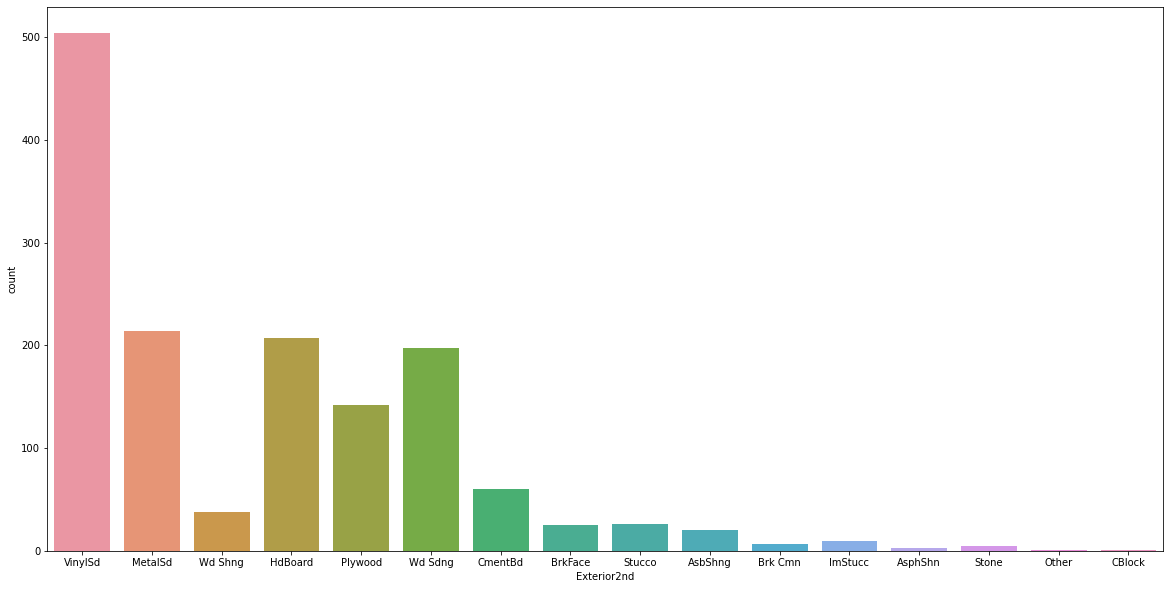

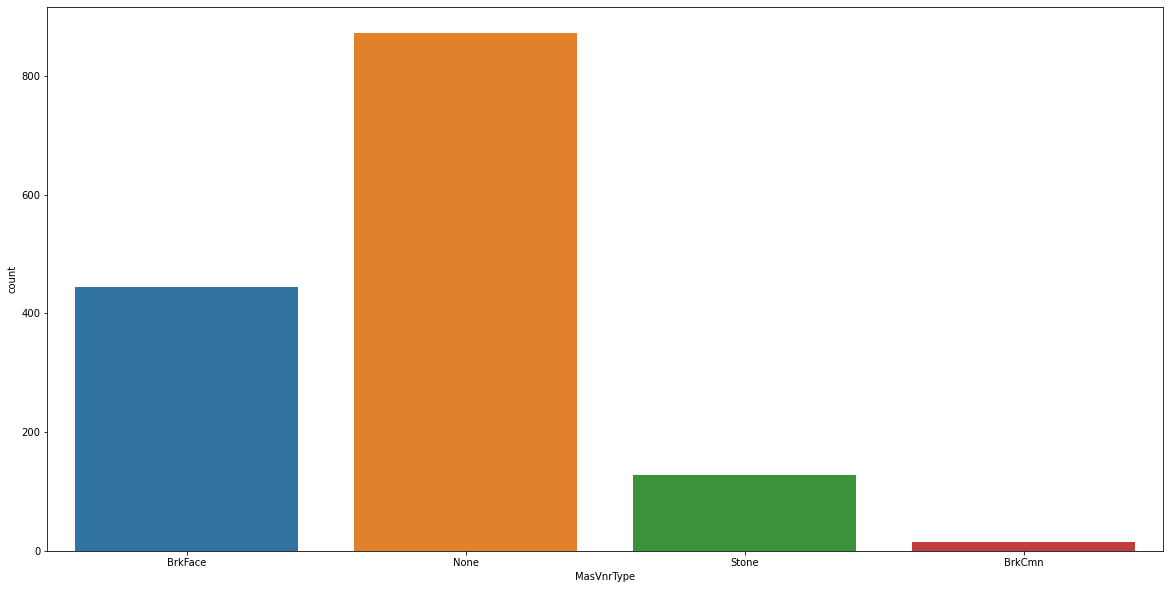

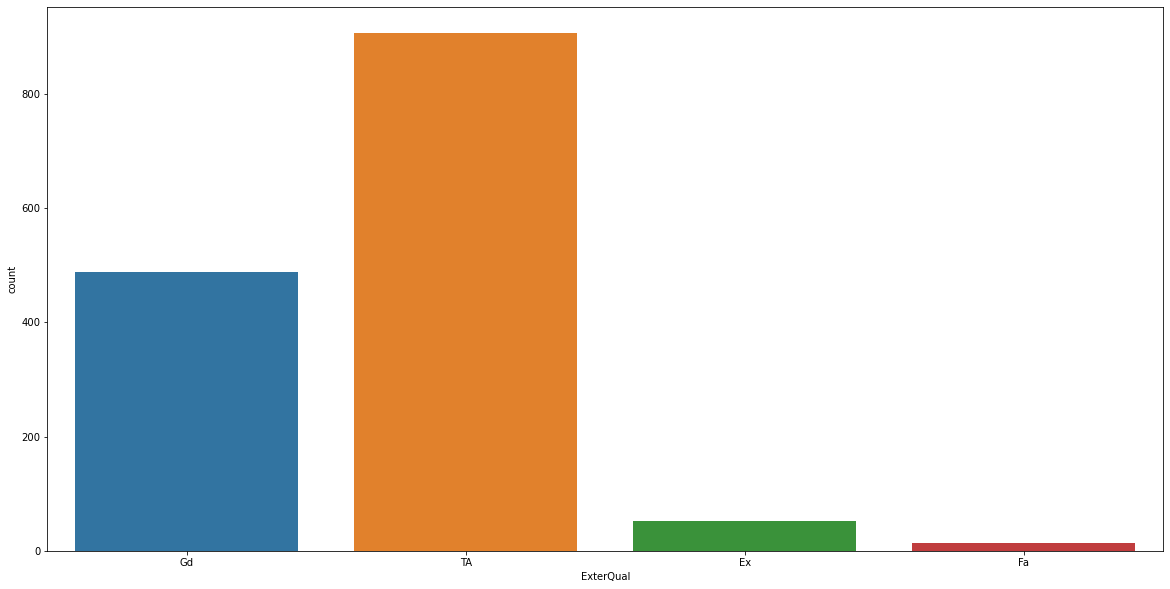

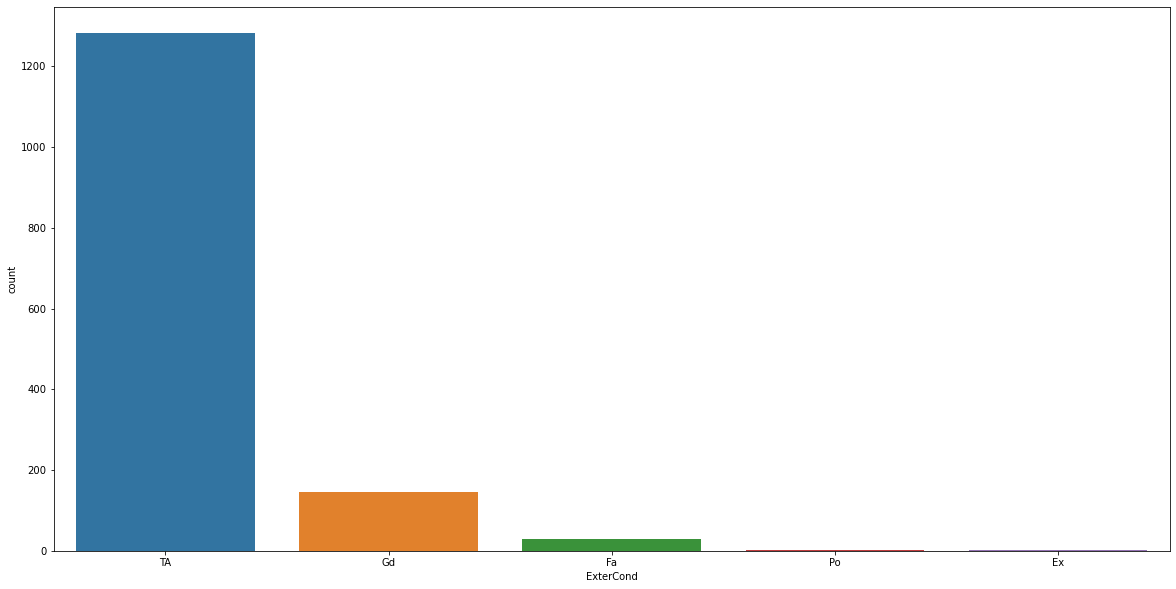

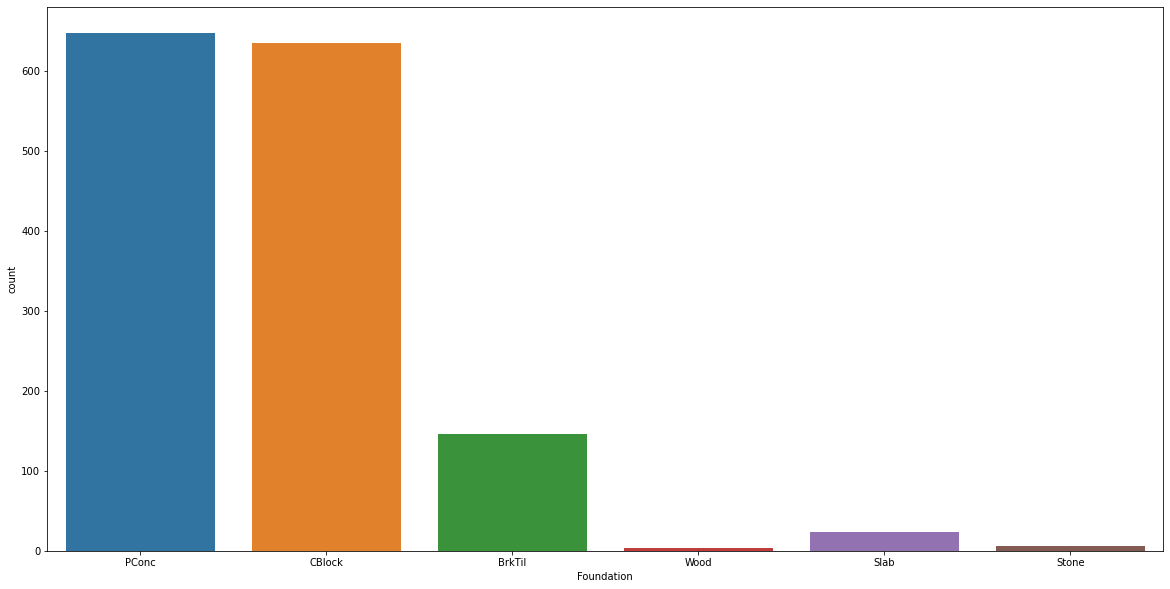

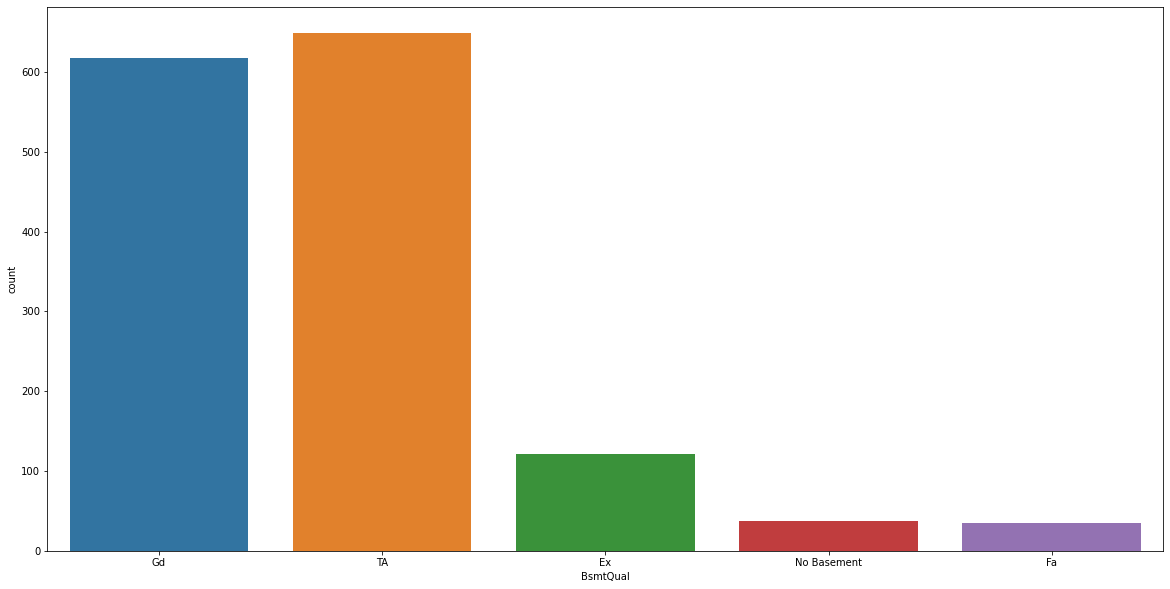

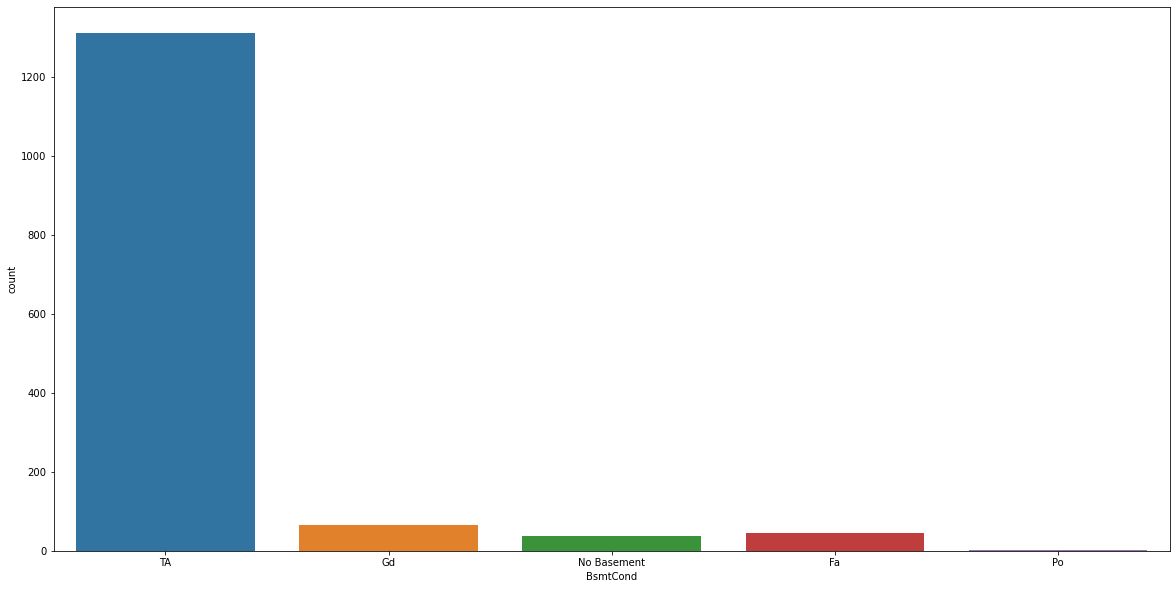

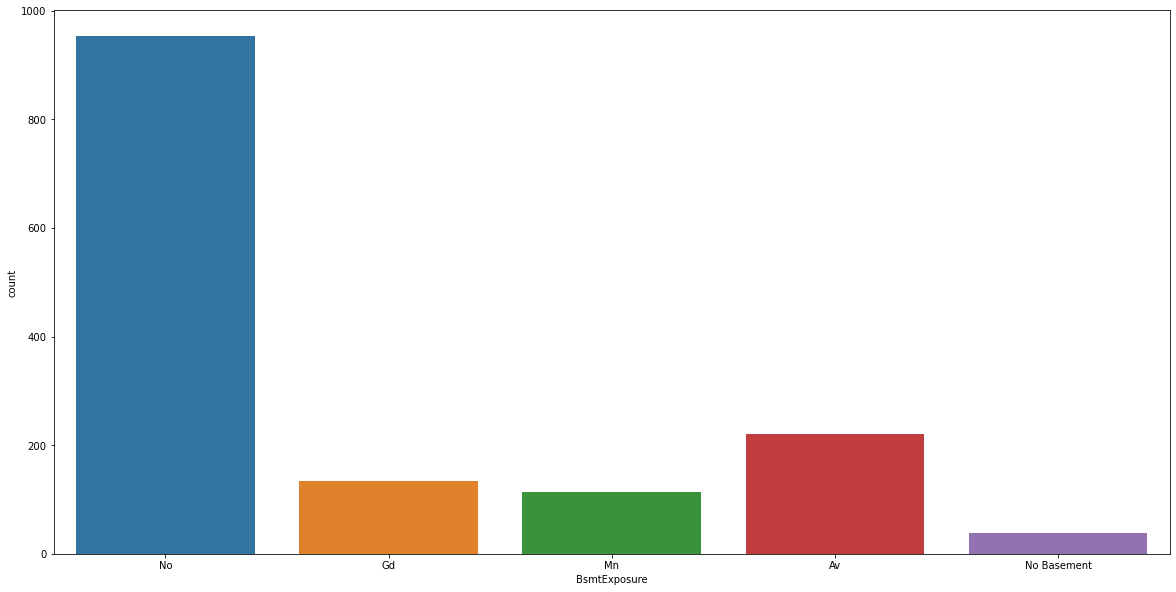

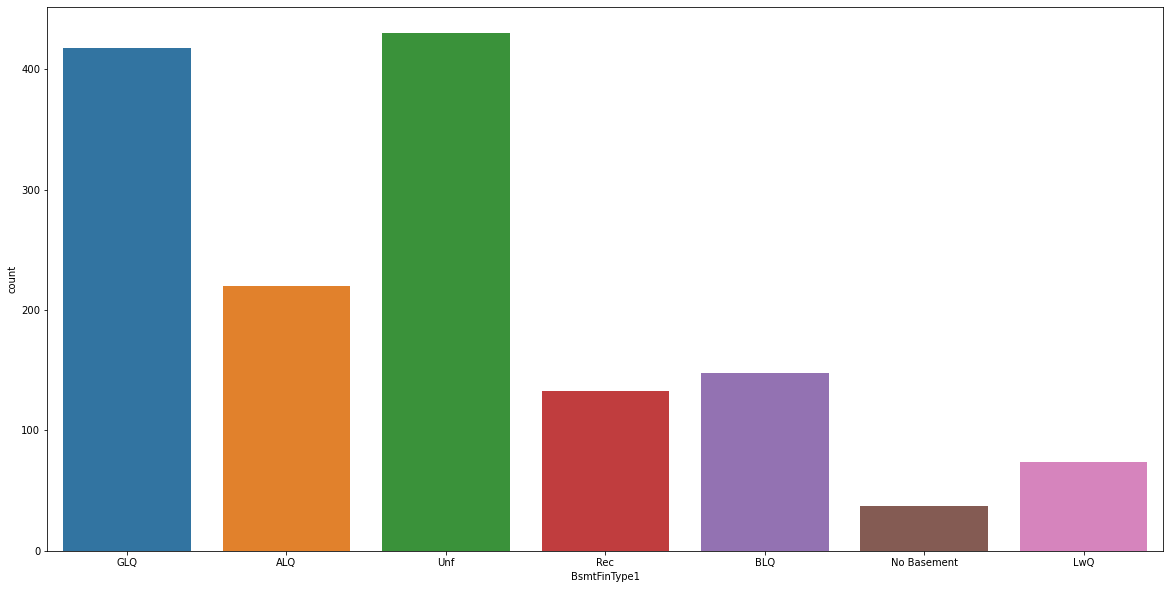

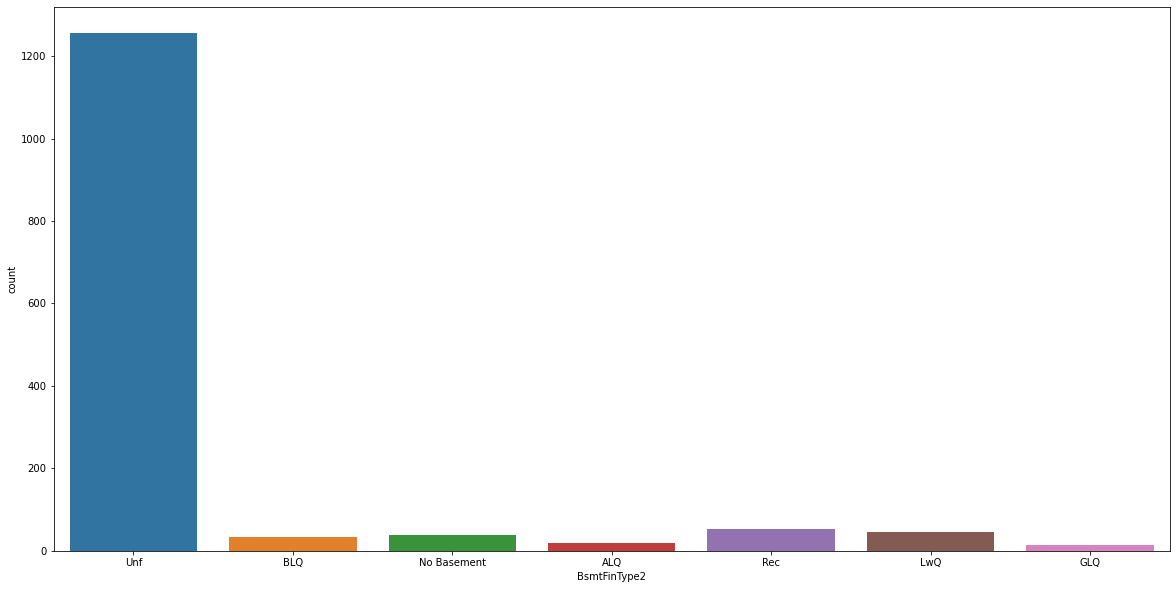

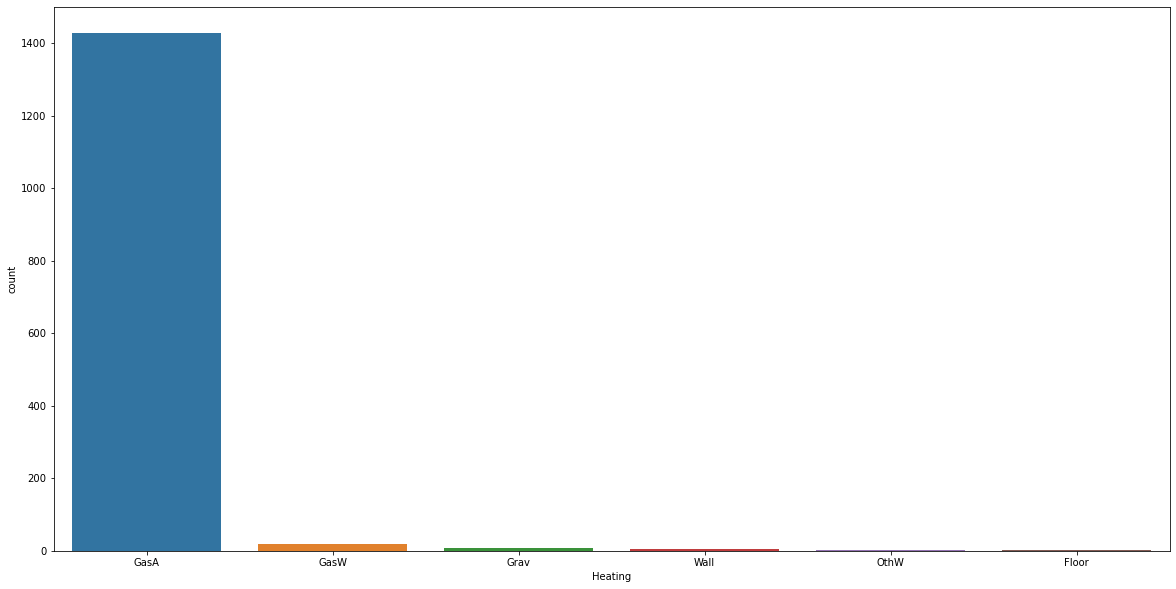

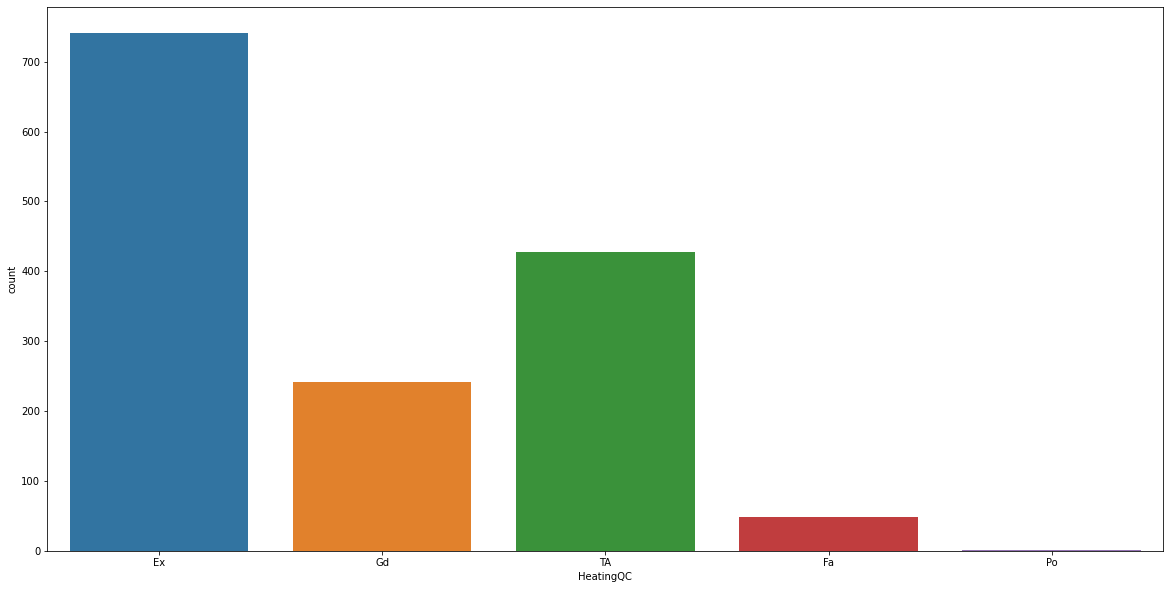

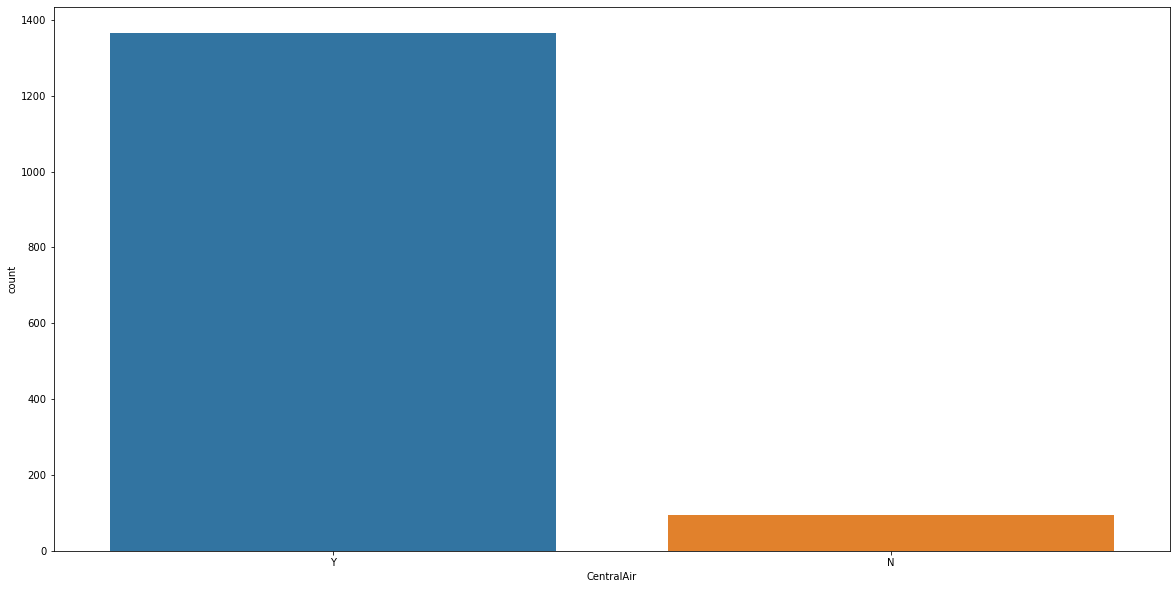

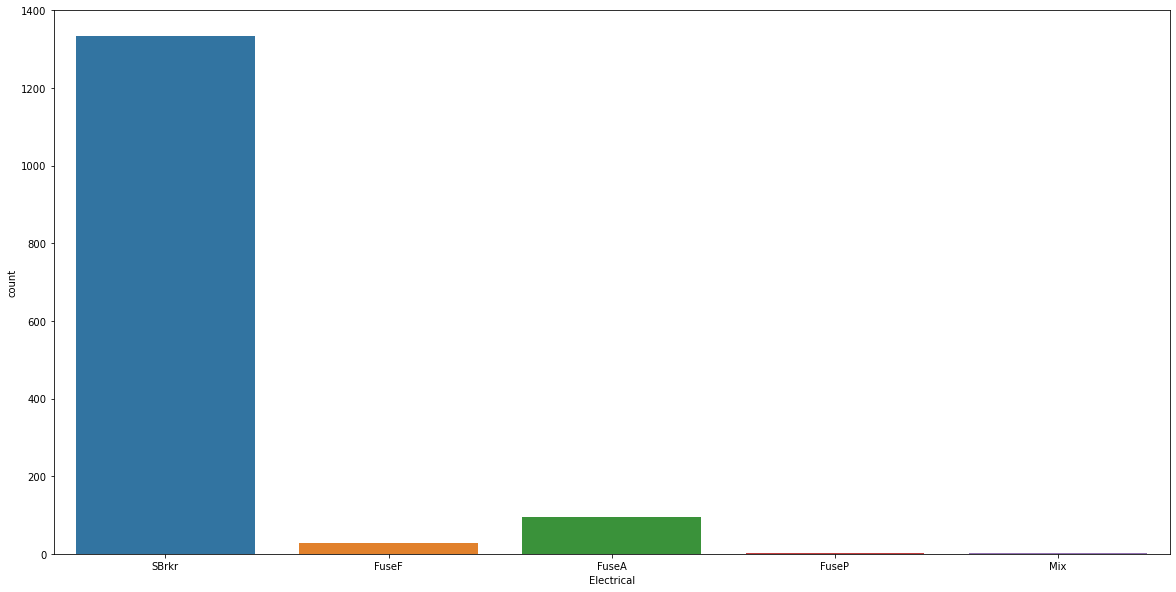

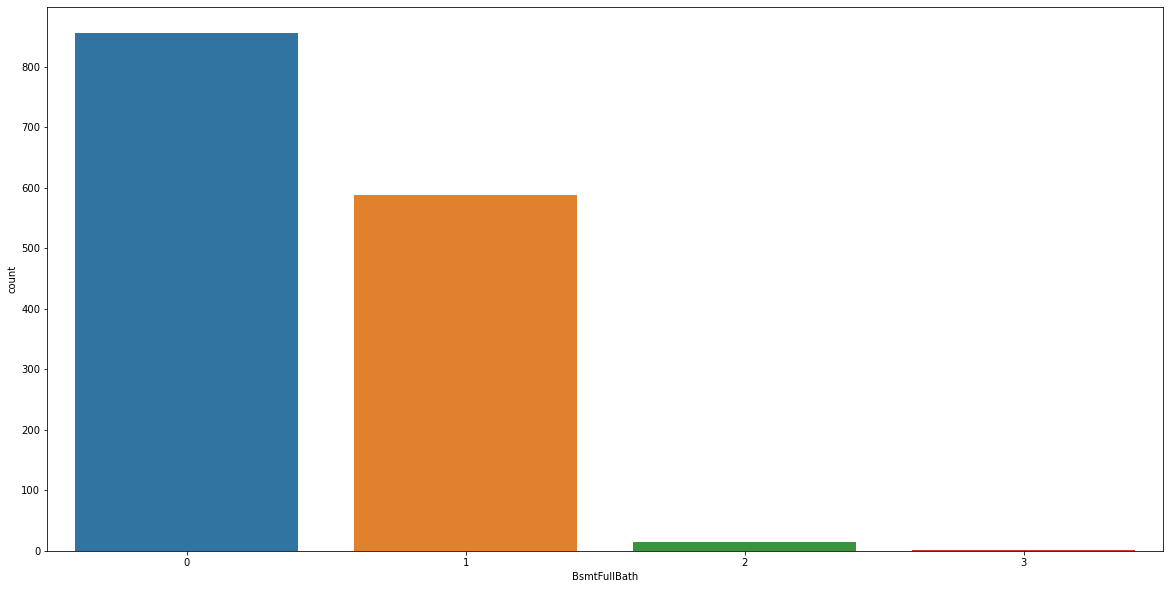

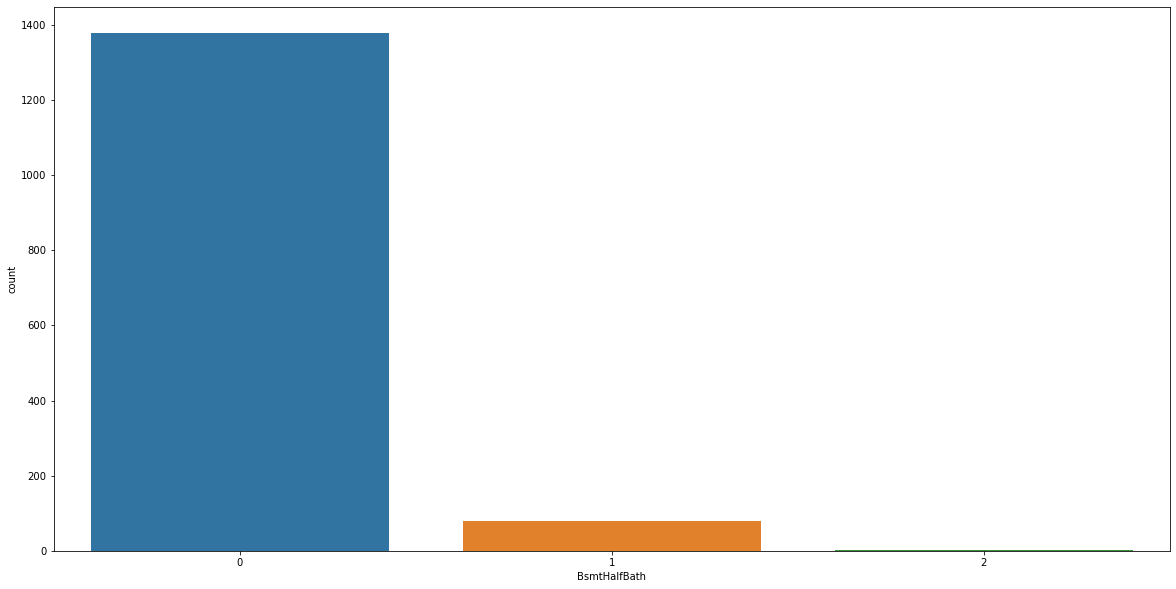

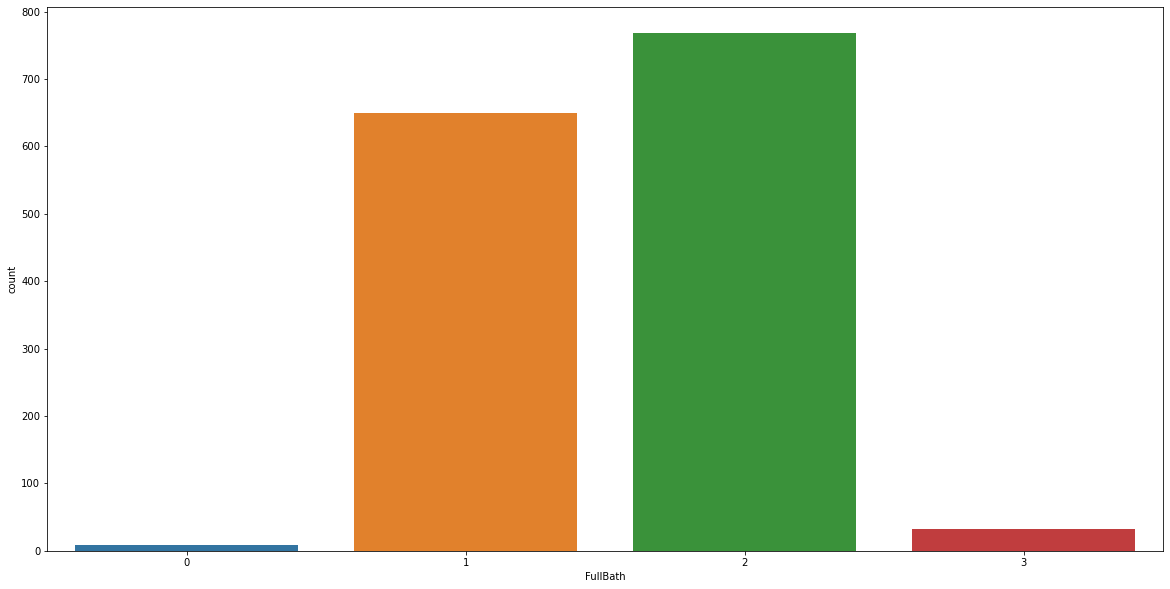

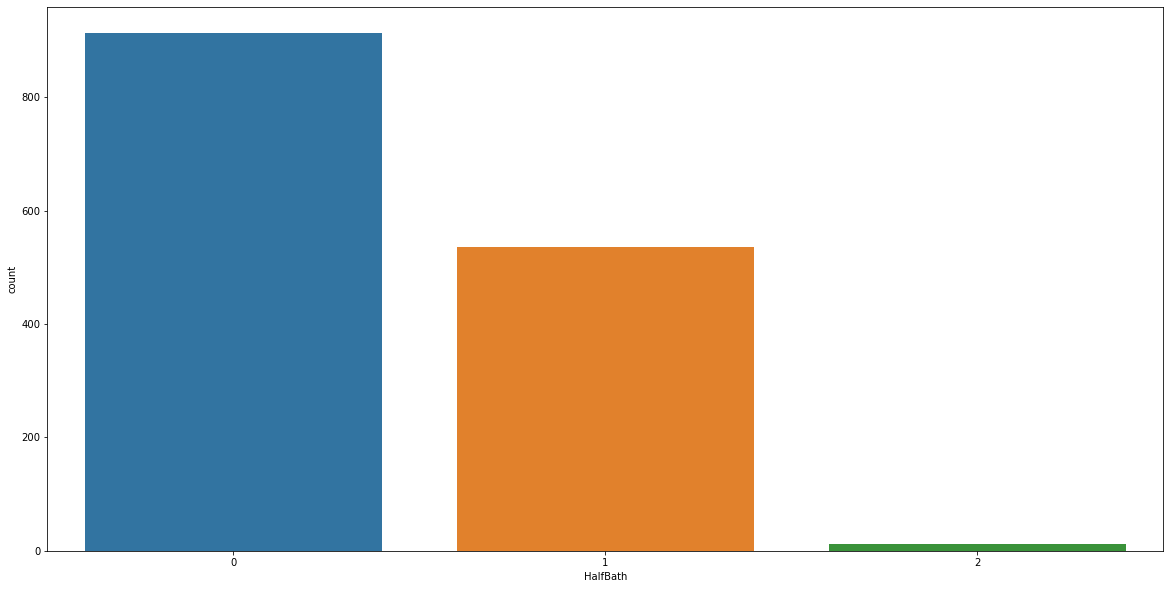

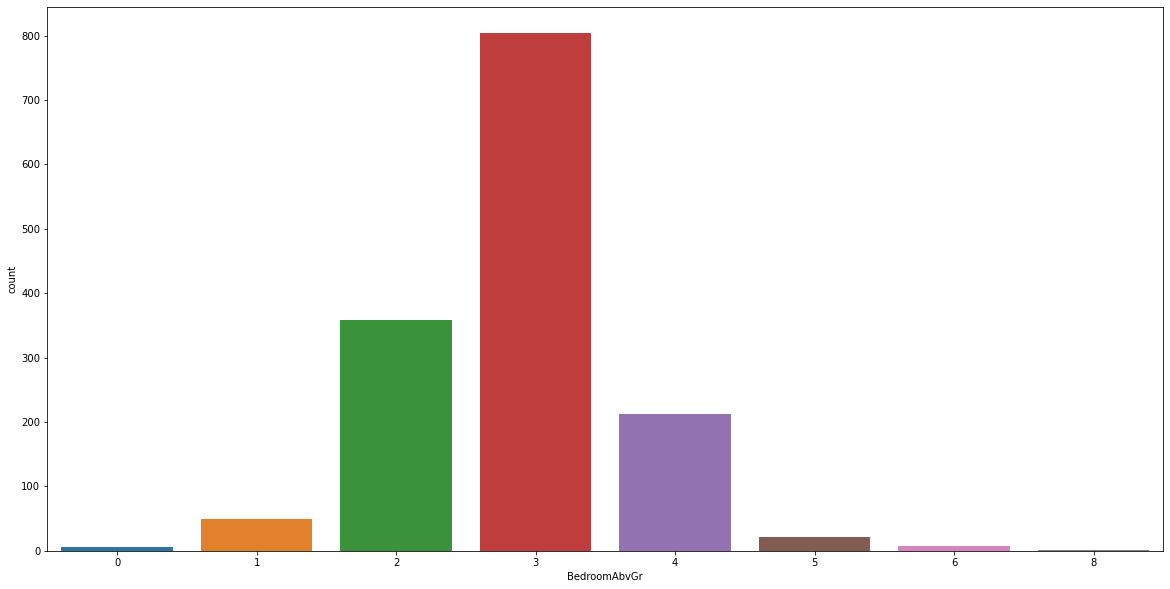

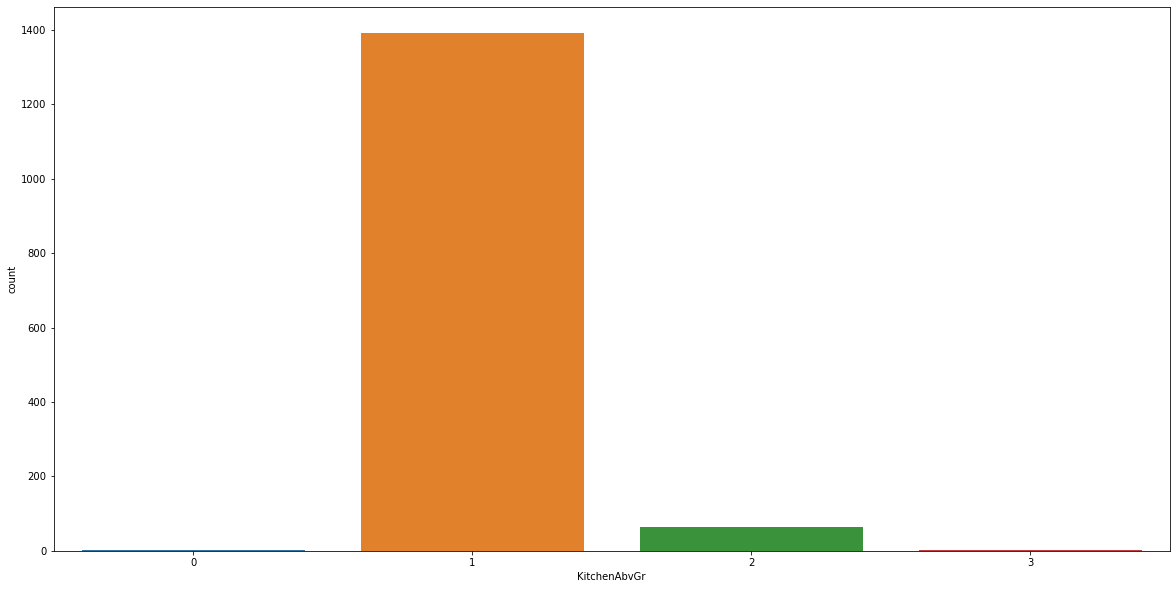

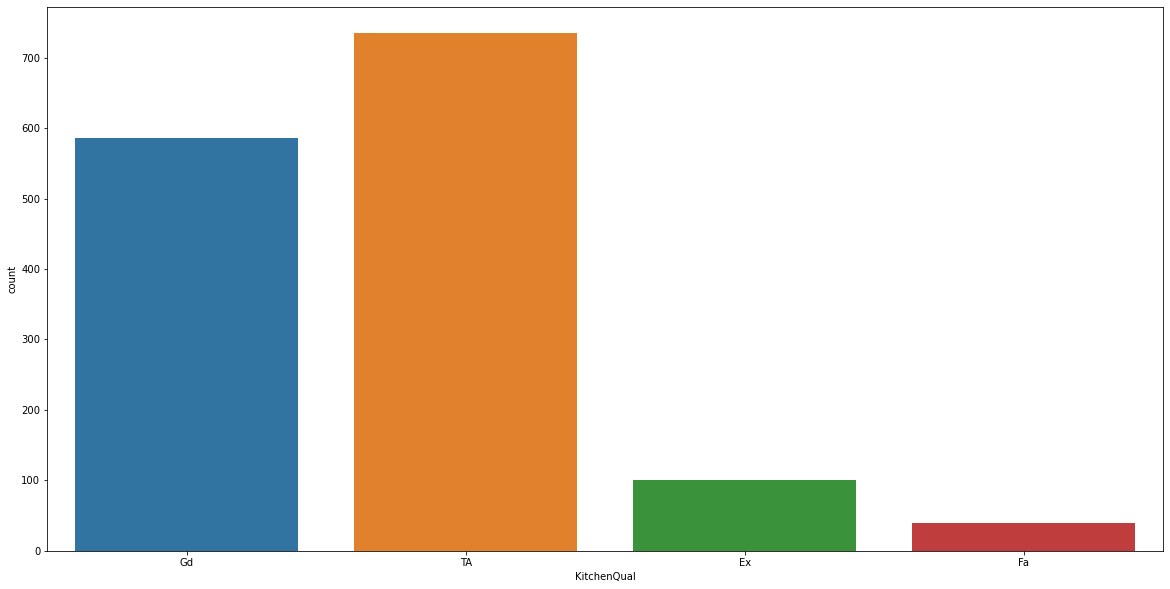

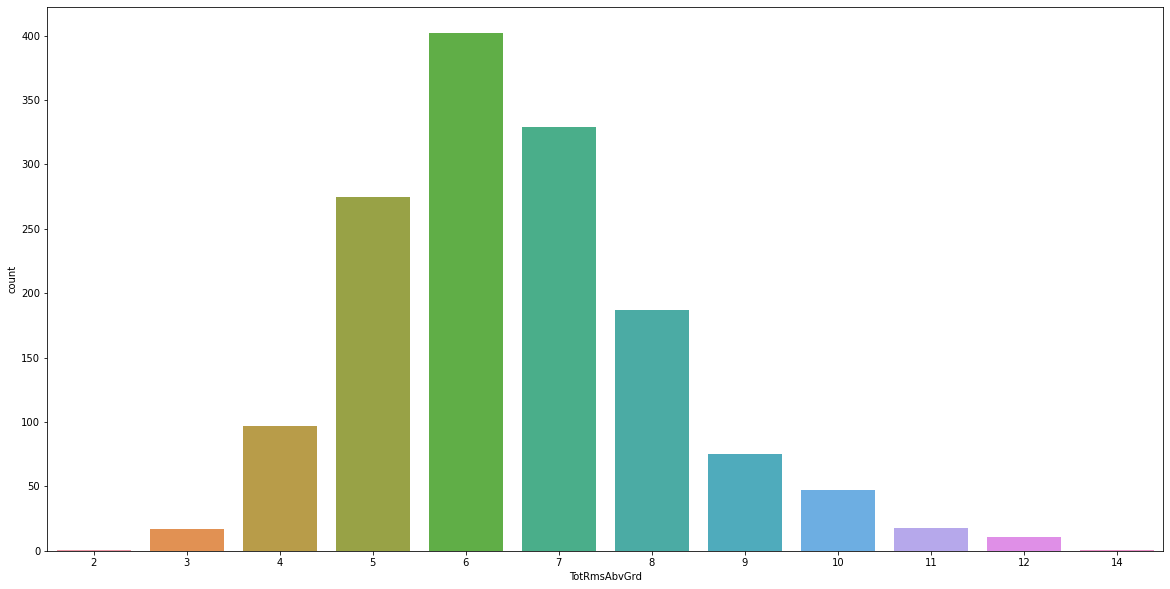

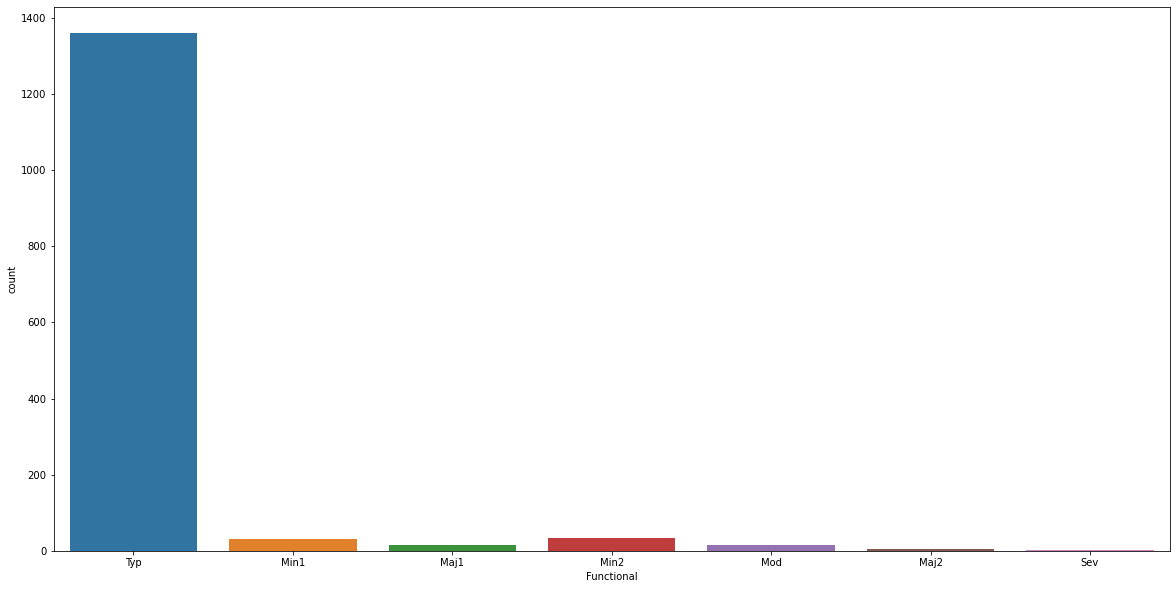

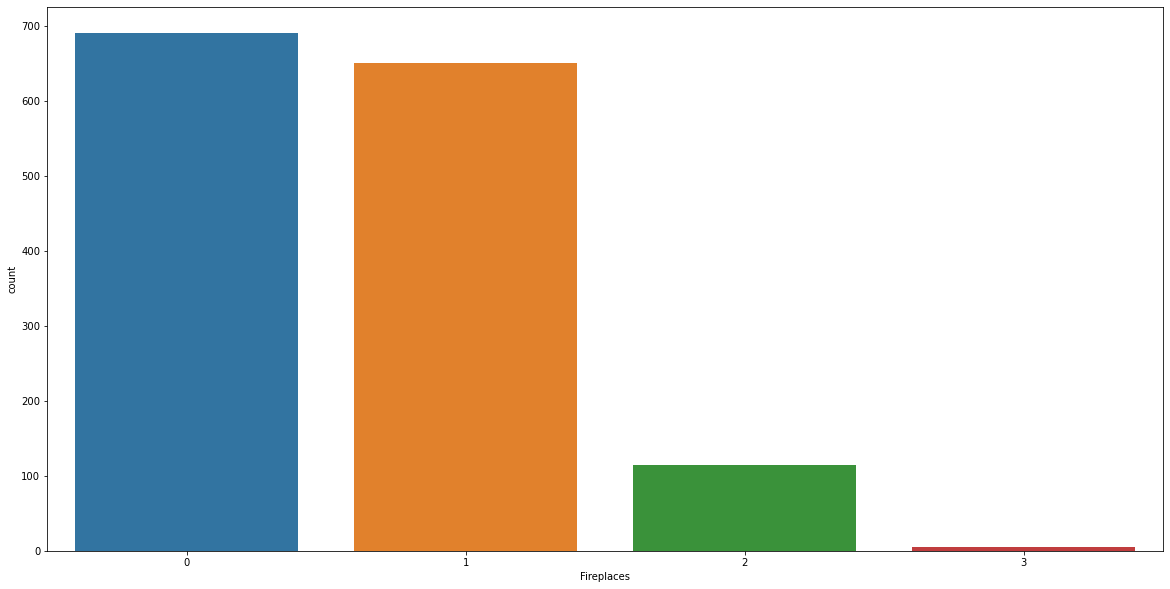

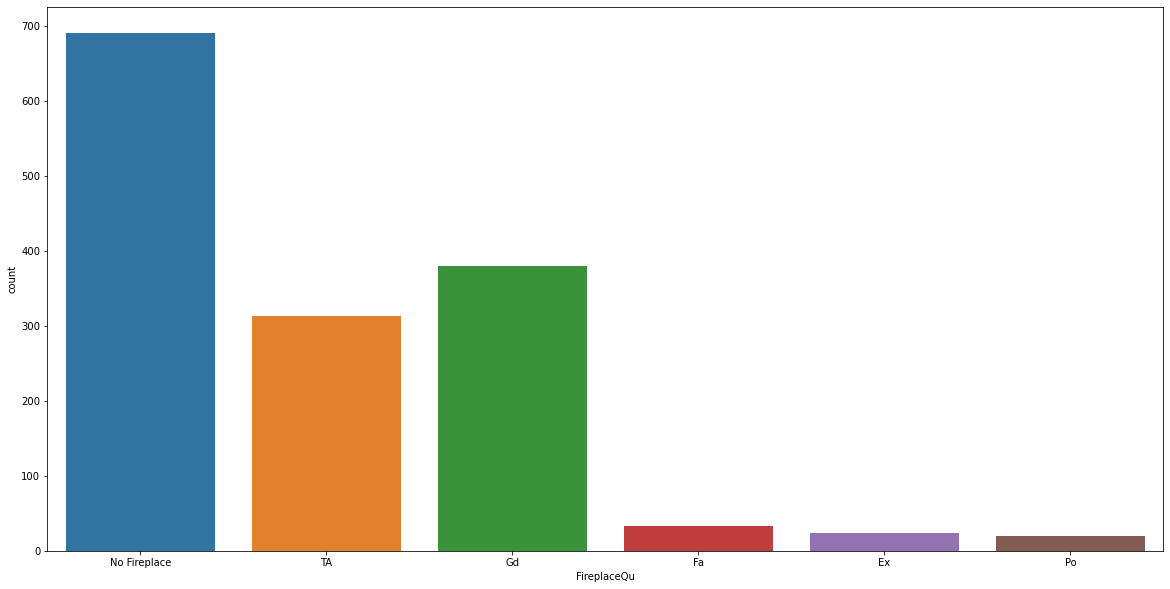

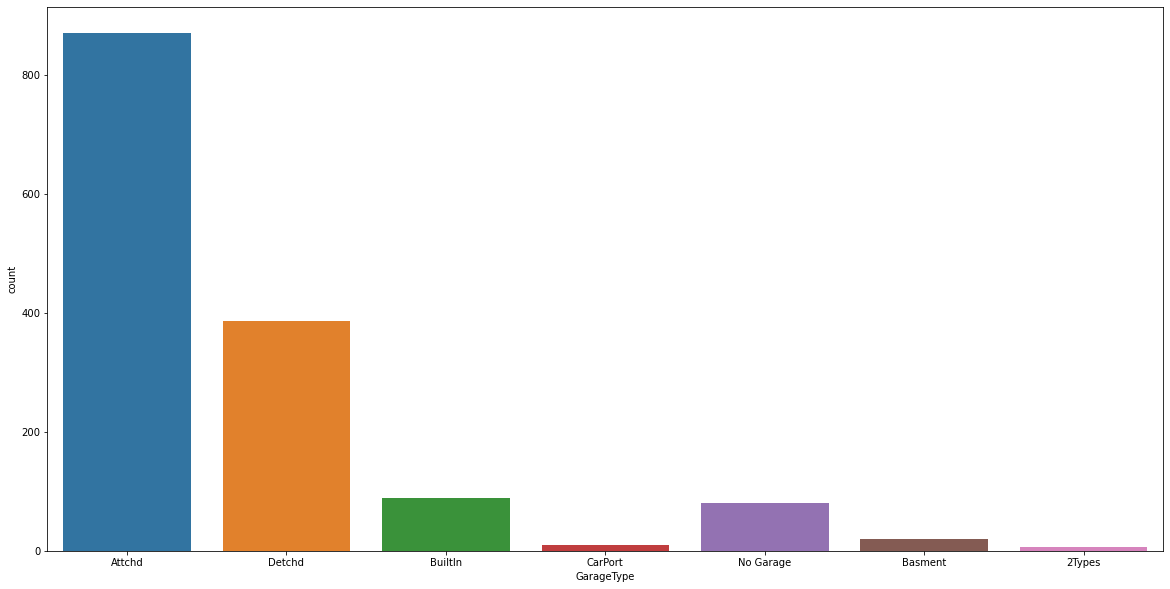

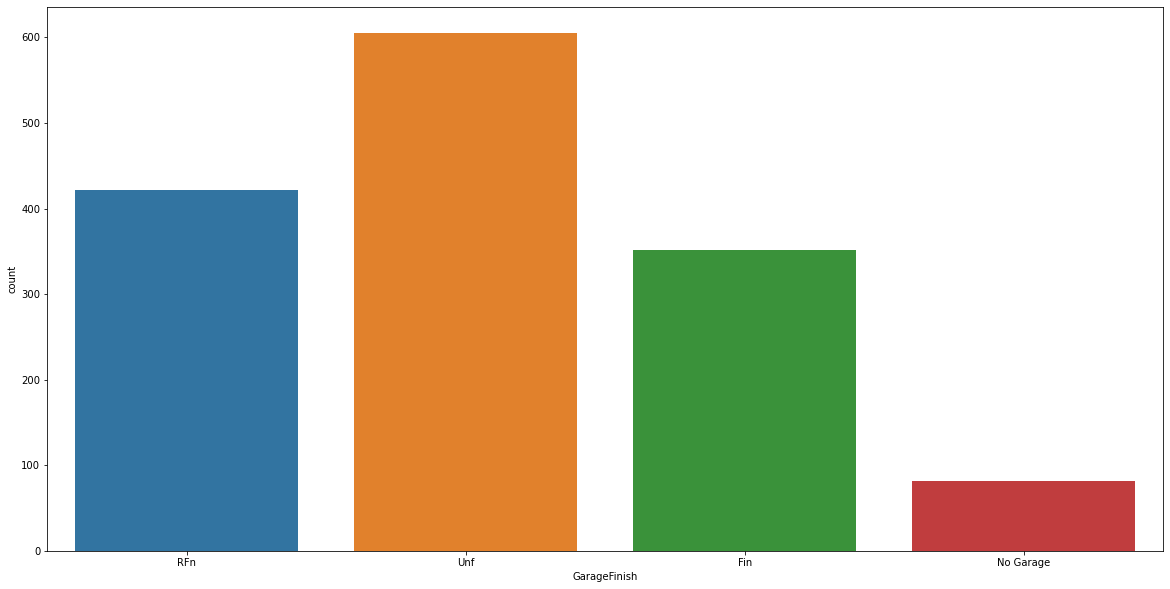

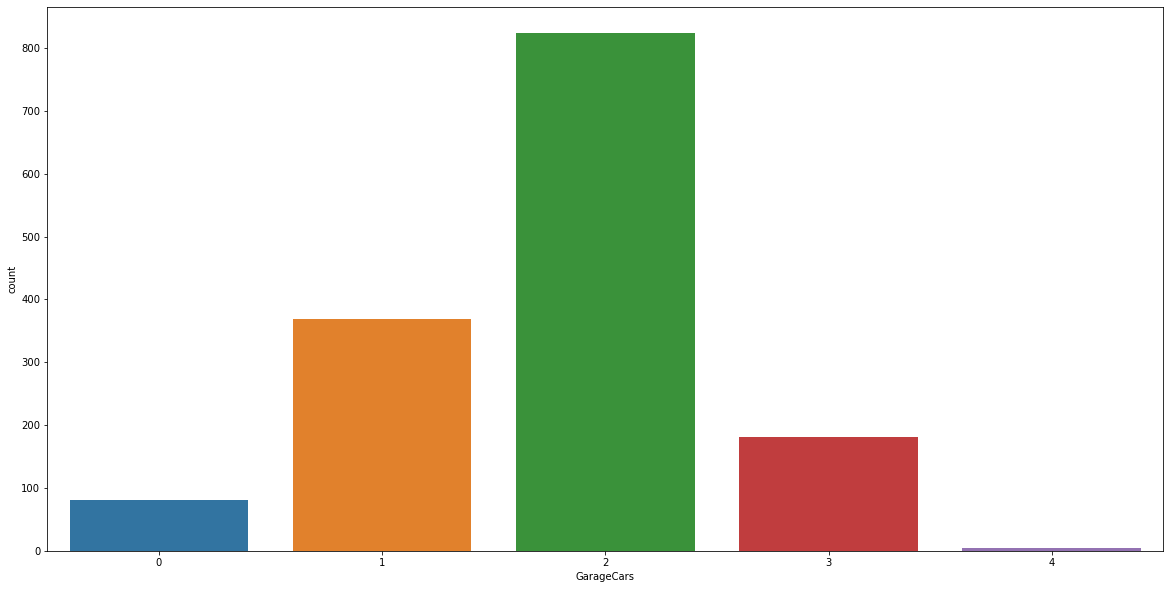

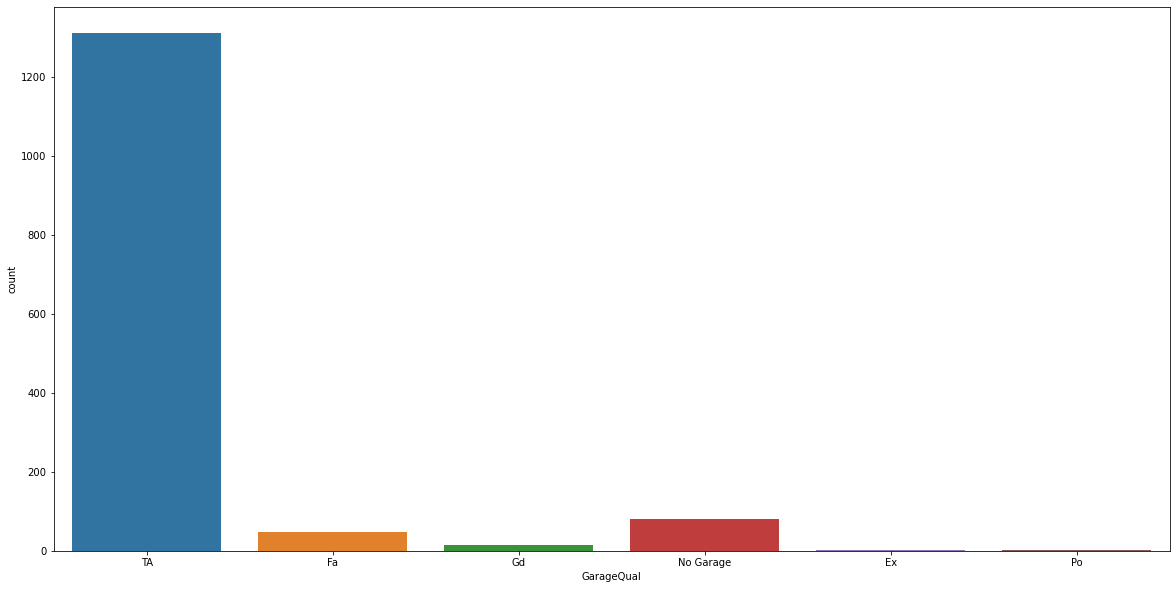

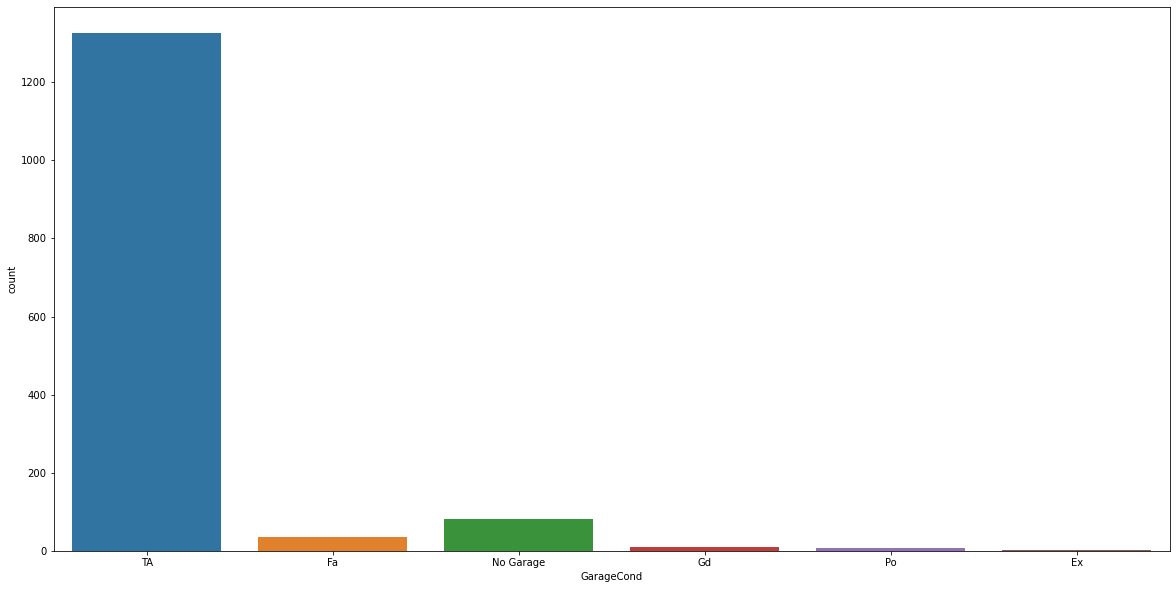

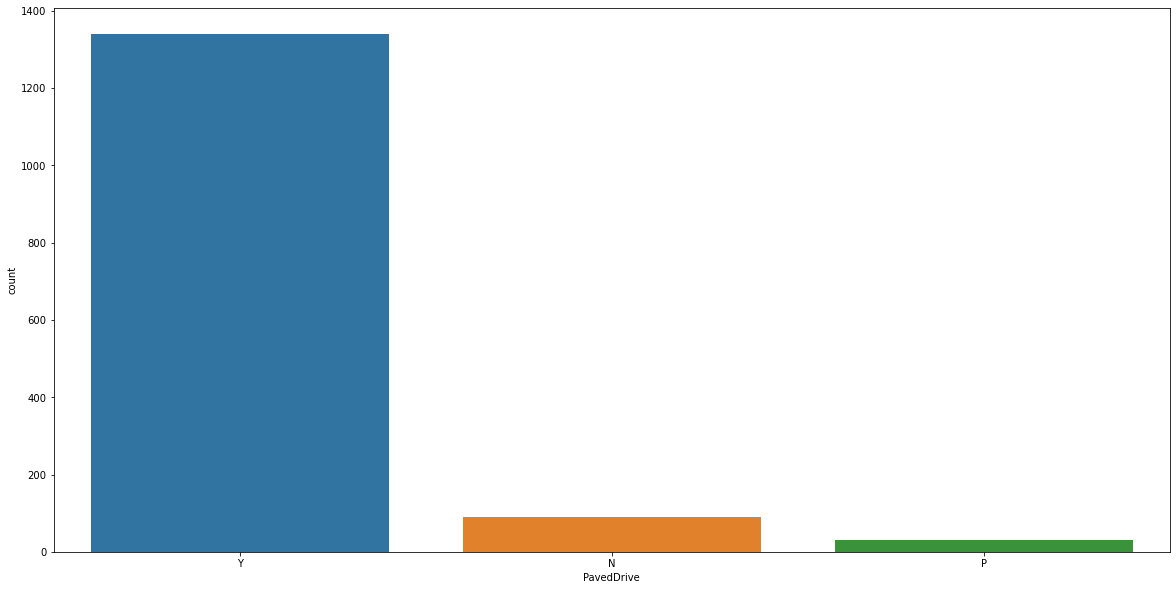

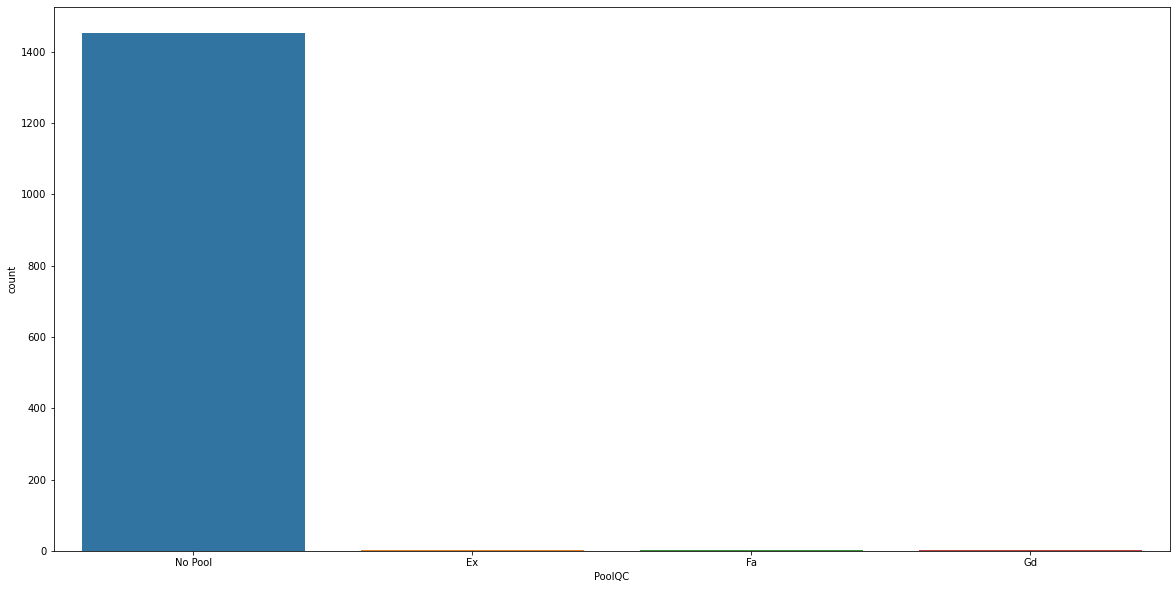

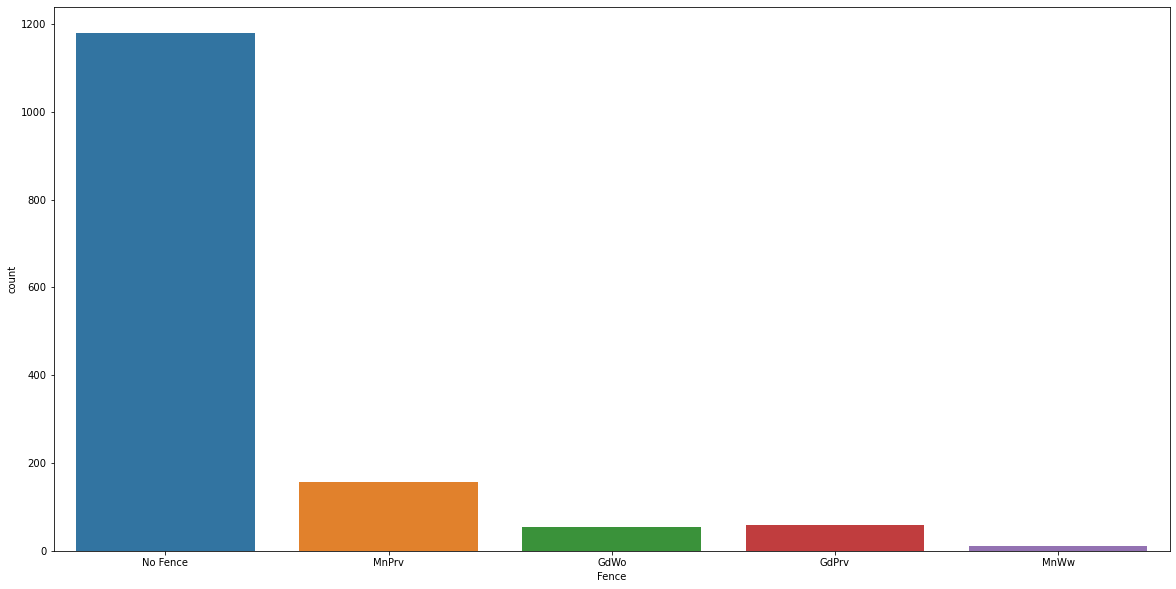

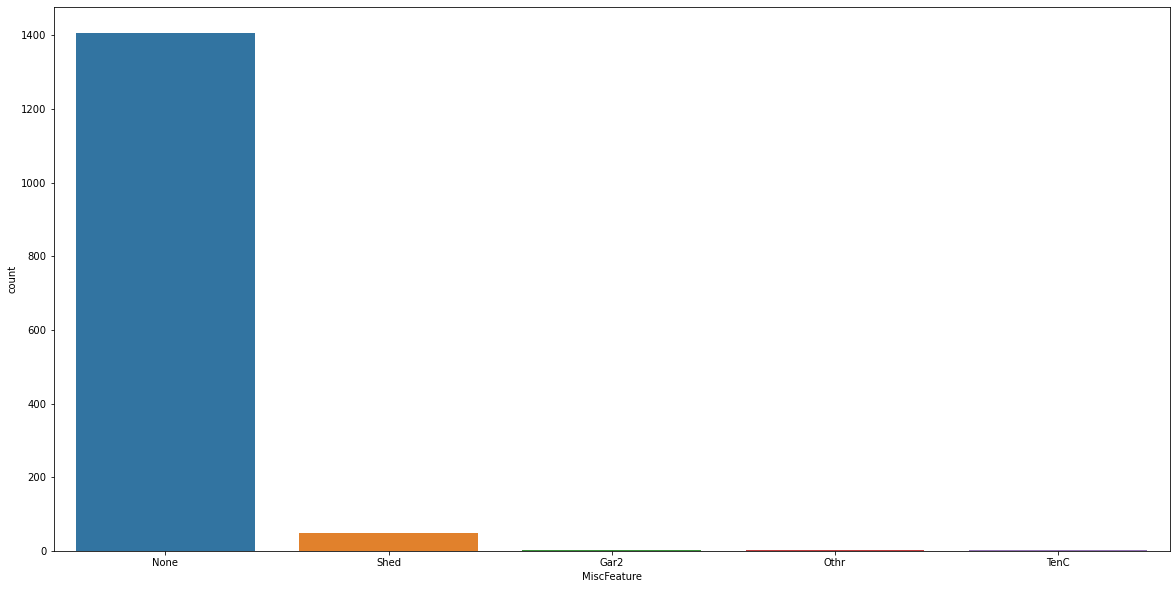

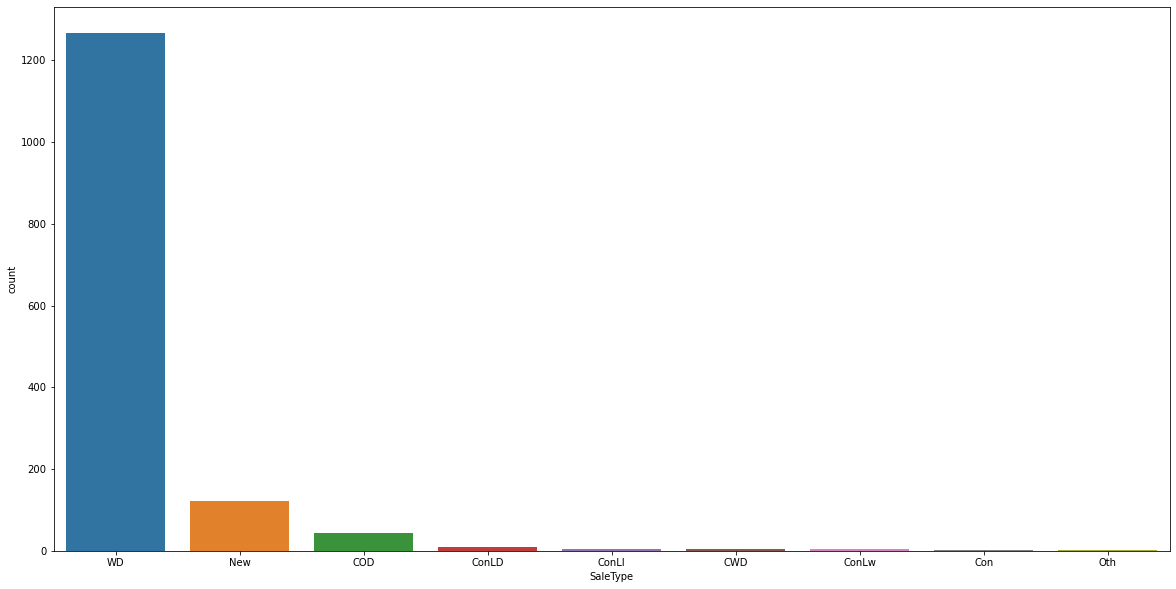

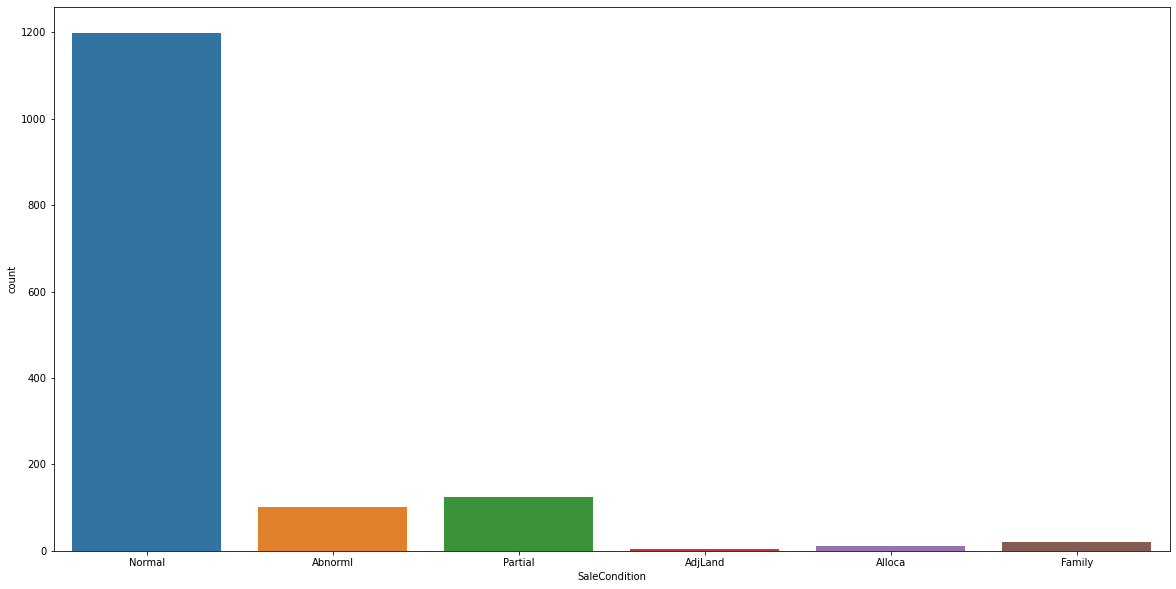

In [34]:
for i, col in enumerate(list_categorical_features):
    categorical_column_plotting(i, col)

<Figure size 1440x720 with 0 Axes>

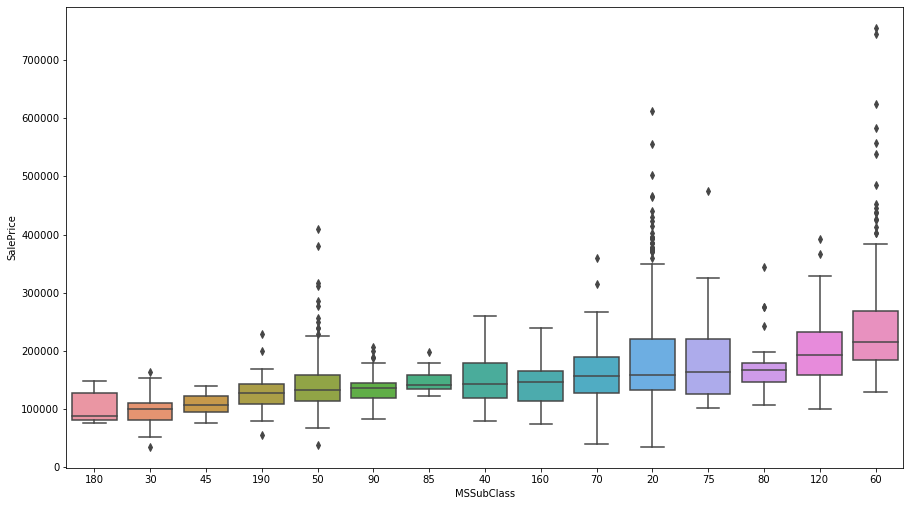

<Figure size 1440x720 with 0 Axes>

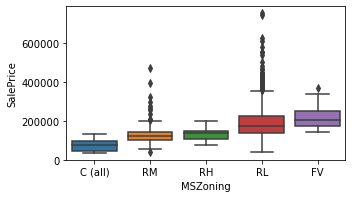

<Figure size 1440x720 with 0 Axes>

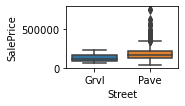

<Figure size 1440x720 with 0 Axes>

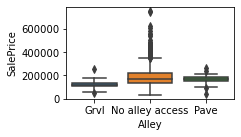

<Figure size 1440x720 with 0 Axes>

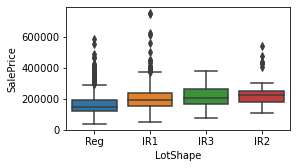

<Figure size 1440x720 with 0 Axes>

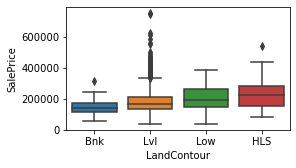

<Figure size 1440x720 with 0 Axes>

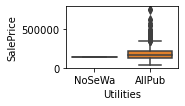

<Figure size 1440x720 with 0 Axes>

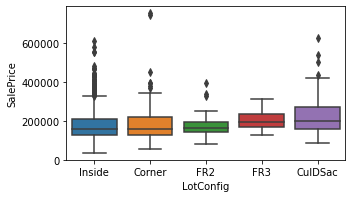

<Figure size 1440x720 with 0 Axes>

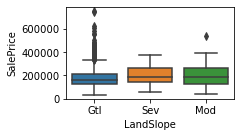

<Figure size 1440x720 with 0 Axes>

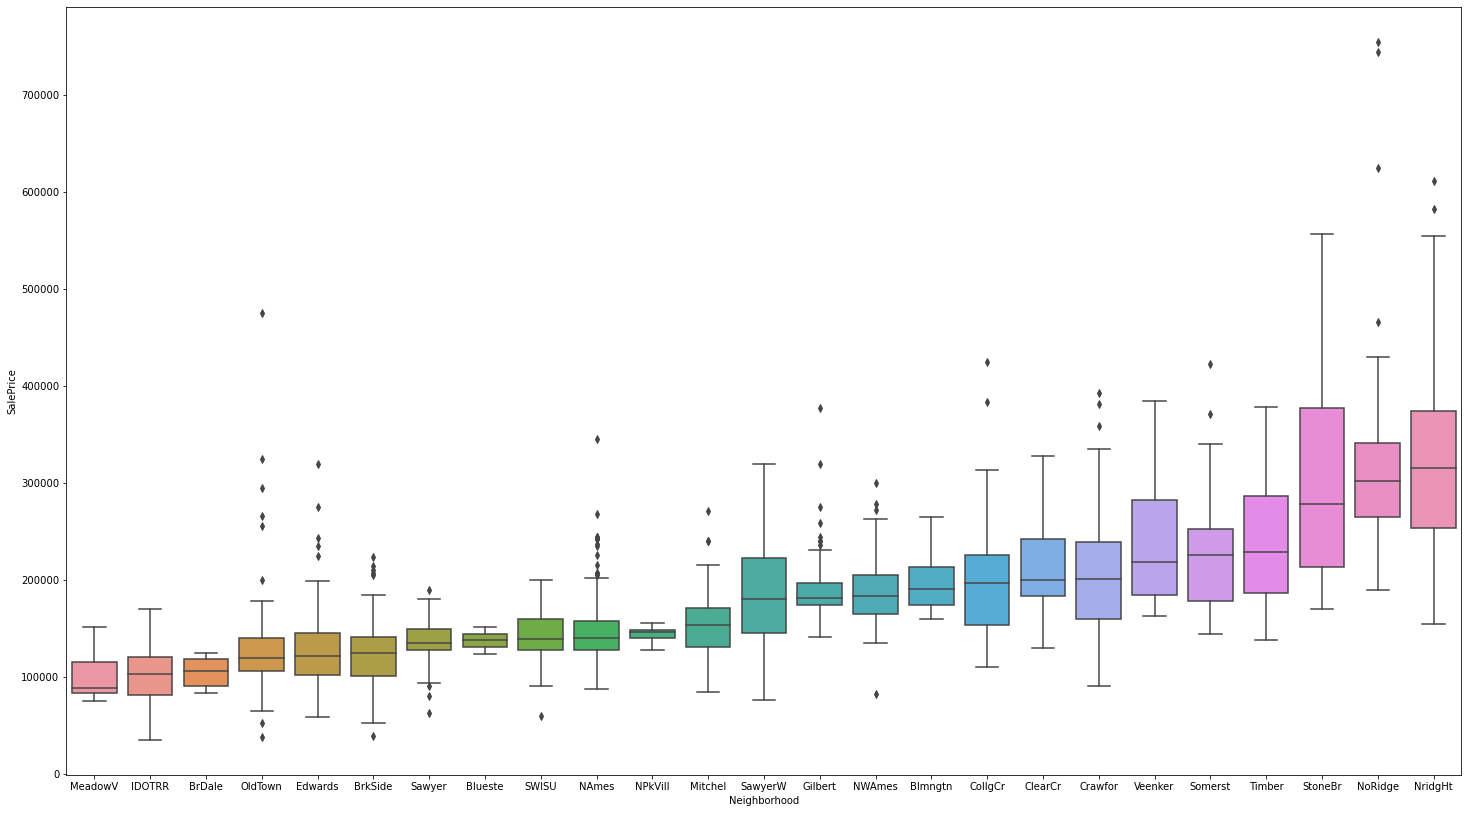

<Figure size 1440x720 with 0 Axes>

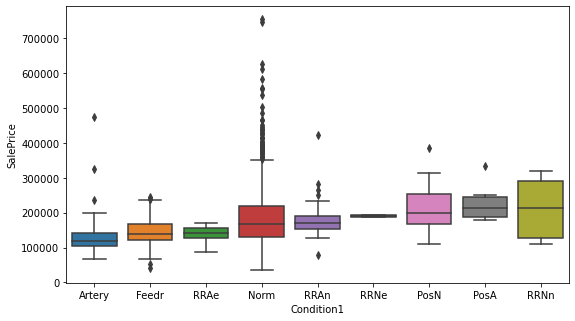

<Figure size 1440x720 with 0 Axes>

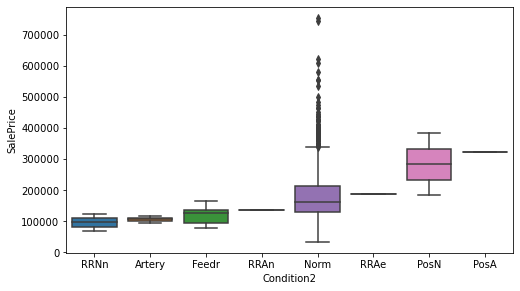

<Figure size 1440x720 with 0 Axes>

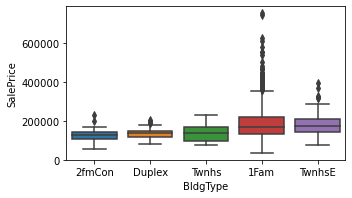

<Figure size 1440x720 with 0 Axes>

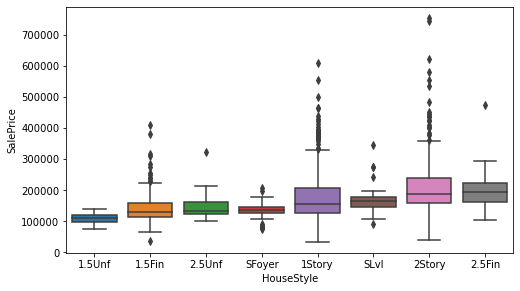

<Figure size 1440x720 with 0 Axes>

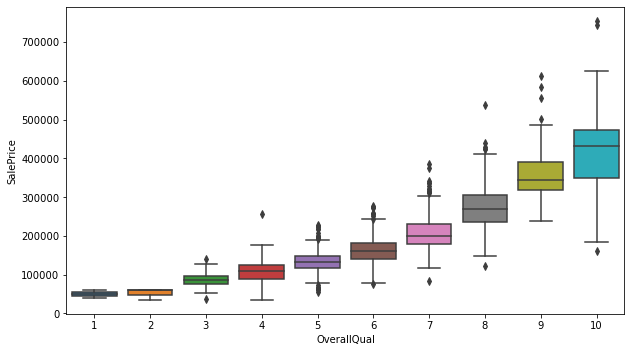

<Figure size 1440x720 with 0 Axes>

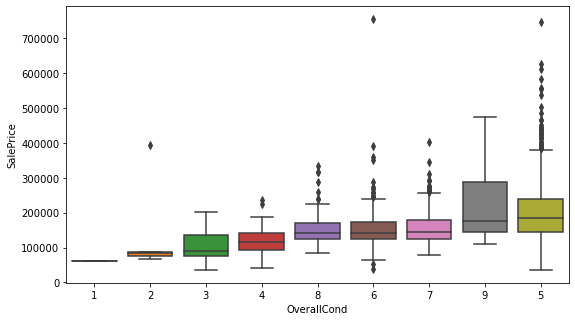

<Figure size 1440x720 with 0 Axes>

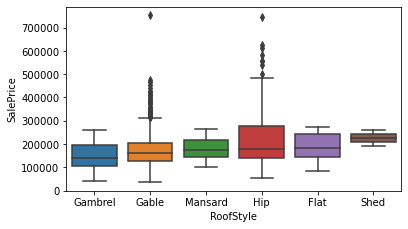

<Figure size 1440x720 with 0 Axes>

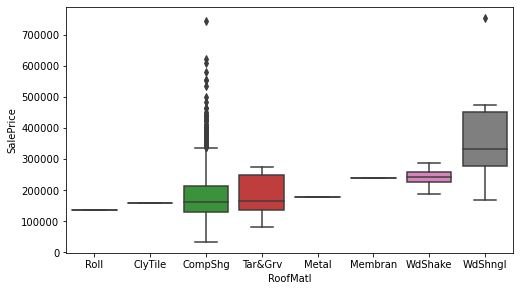

<Figure size 1440x720 with 0 Axes>

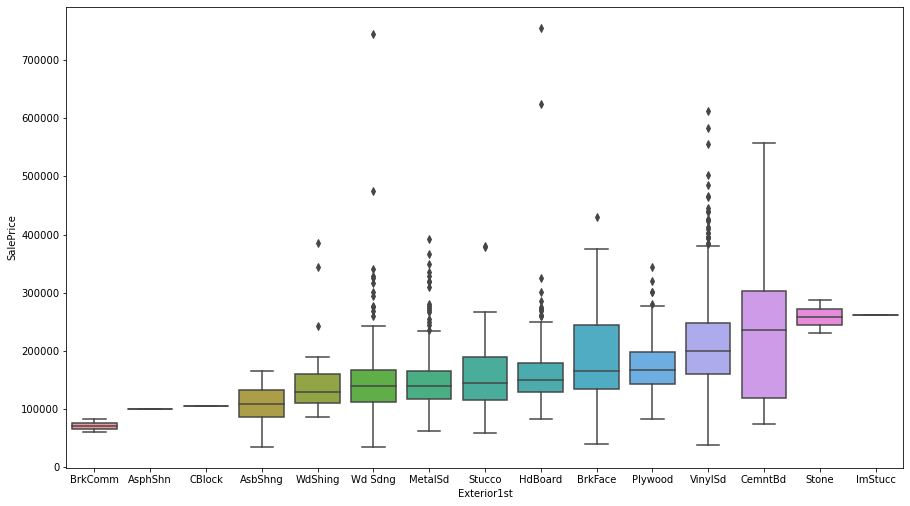

<Figure size 1440x720 with 0 Axes>

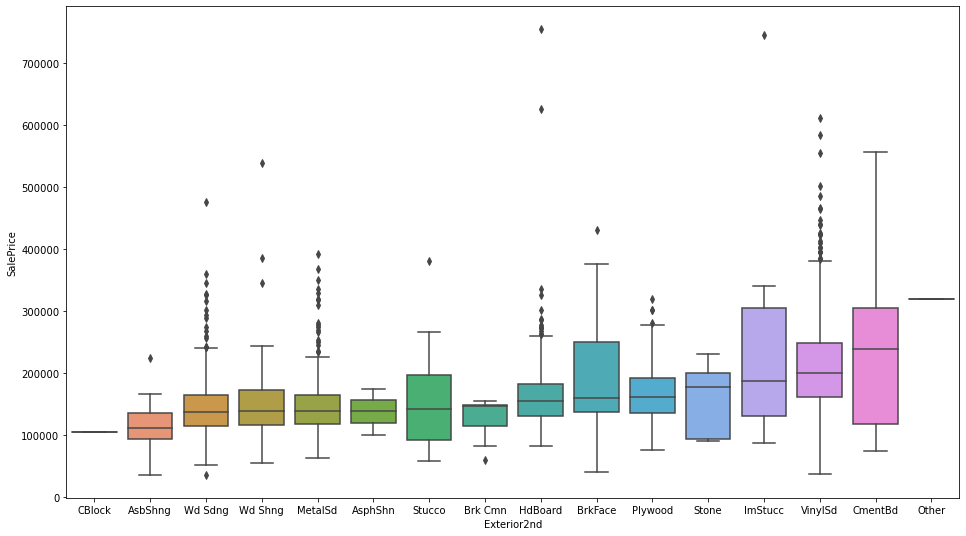

<Figure size 1440x720 with 0 Axes>

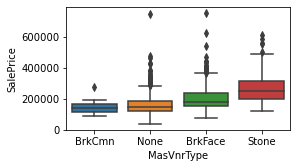

<Figure size 1440x720 with 0 Axes>

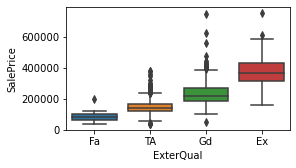

<Figure size 1440x720 with 0 Axes>

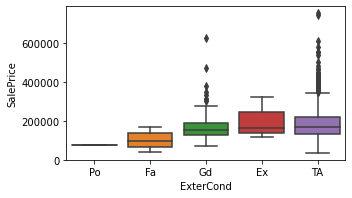

<Figure size 1440x720 with 0 Axes>

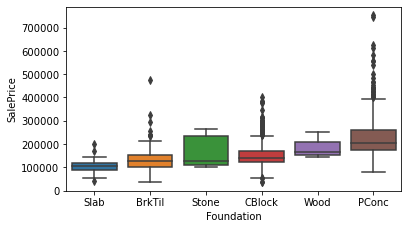

<Figure size 1440x720 with 0 Axes>

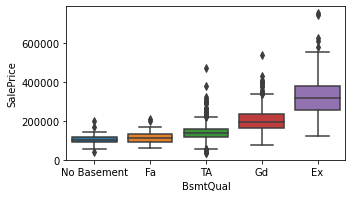

<Figure size 1440x720 with 0 Axes>

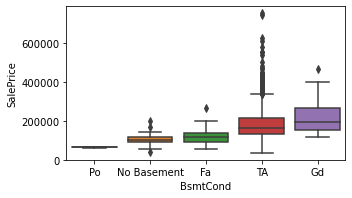

<Figure size 1440x720 with 0 Axes>

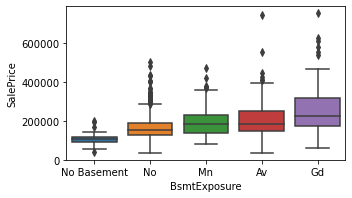

<Figure size 1440x720 with 0 Axes>

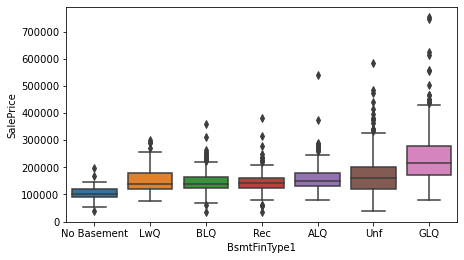

<Figure size 1440x720 with 0 Axes>

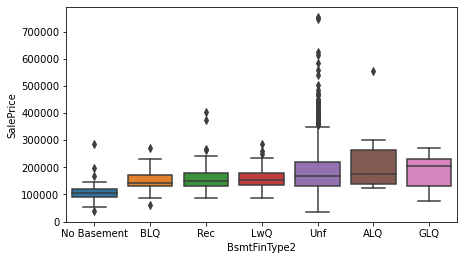

<Figure size 1440x720 with 0 Axes>

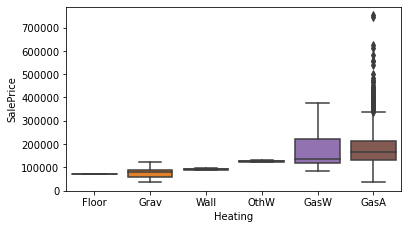

<Figure size 1440x720 with 0 Axes>

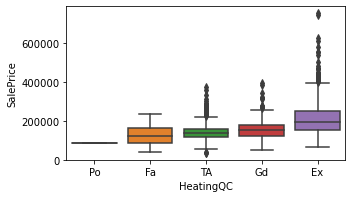

<Figure size 1440x720 with 0 Axes>

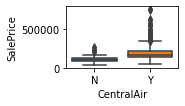

<Figure size 1440x720 with 0 Axes>

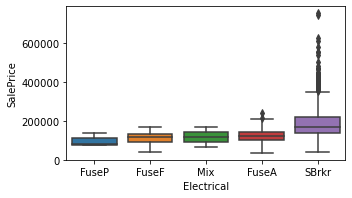

<Figure size 1440x720 with 0 Axes>

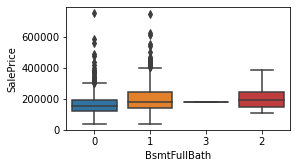

<Figure size 1440x720 with 0 Axes>

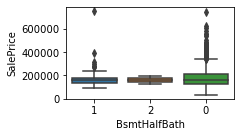

<Figure size 1440x720 with 0 Axes>

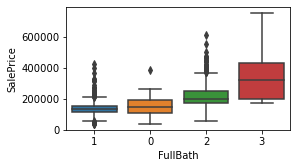

<Figure size 1440x720 with 0 Axes>

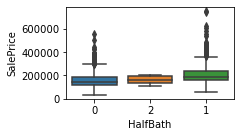

<Figure size 1440x720 with 0 Axes>

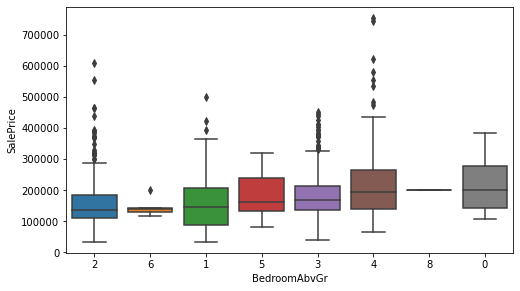

<Figure size 1440x720 with 0 Axes>

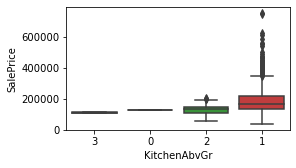

<Figure size 1440x720 with 0 Axes>

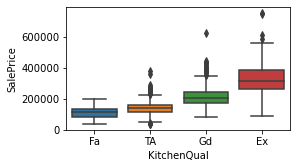

<Figure size 1440x720 with 0 Axes>

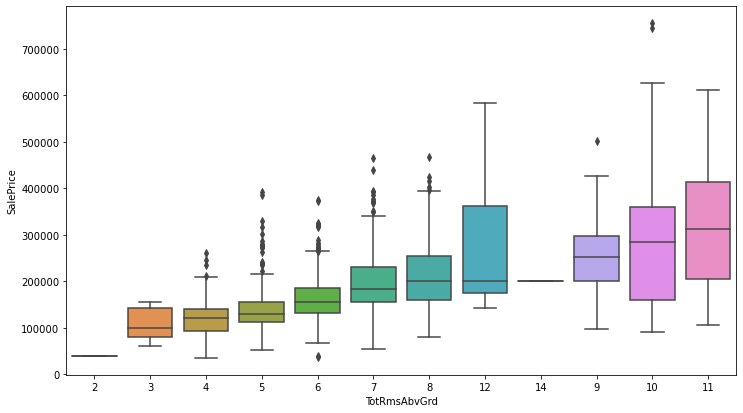

<Figure size 1440x720 with 0 Axes>

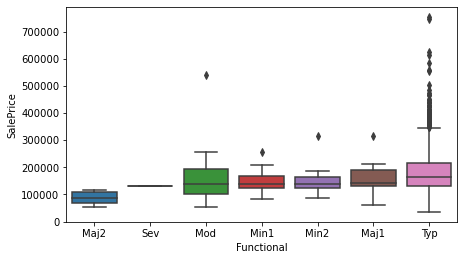

<Figure size 1440x720 with 0 Axes>

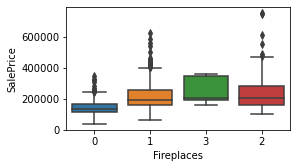

<Figure size 1440x720 with 0 Axes>

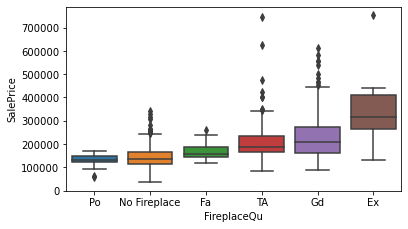

<Figure size 1440x720 with 0 Axes>

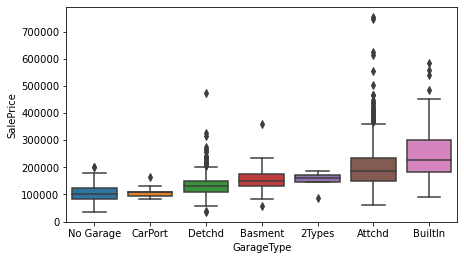

<Figure size 1440x720 with 0 Axes>

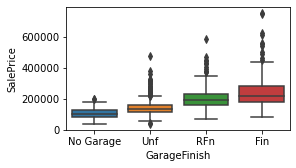

<Figure size 1440x720 with 0 Axes>

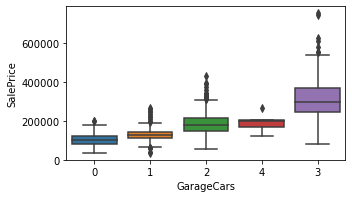

<Figure size 1440x720 with 0 Axes>

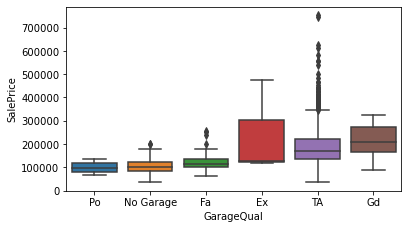

<Figure size 1440x720 with 0 Axes>

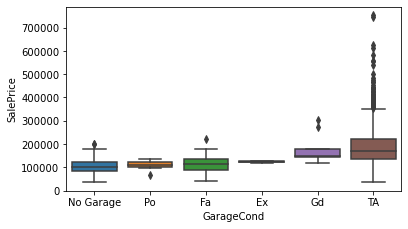

<Figure size 1440x720 with 0 Axes>

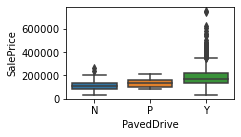

<Figure size 1440x720 with 0 Axes>

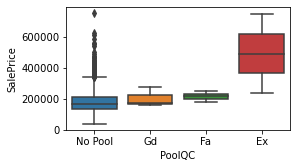

<Figure size 1440x720 with 0 Axes>

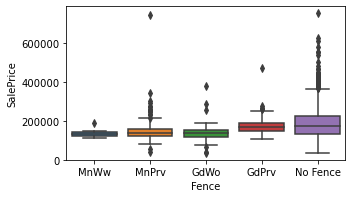

<Figure size 1440x720 with 0 Axes>

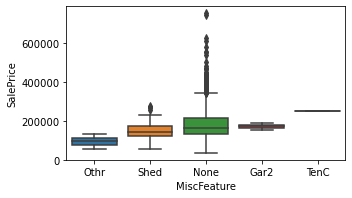

<Figure size 1440x720 with 0 Axes>

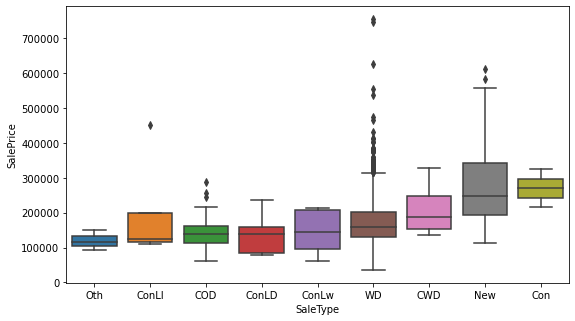

<Figure size 1440x720 with 0 Axes>

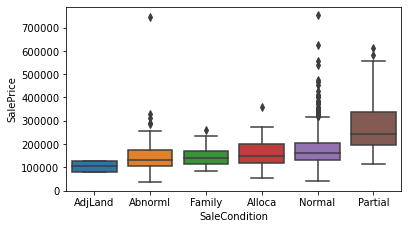

In [35]:
y_col = 'SalePrice'
for i, col in enumerate(list_categorical_features):
    categorical_column_plotting2(i, col, y_col)

In [36]:
for i in list_categorical_features:
    print(f'\nPercentages of unique values per sub-category in {i} are :\n{df[i].value_counts(normalize=True)*100}')


Percentages of unique values per sub-category in MSSubClass are :
20     36.712329
60     20.479452
50      9.863014
120     5.958904
30      4.726027
160     4.315068
70      4.109589
80      3.972603
90      3.561644
190     2.054795
85      1.369863
75      1.095890
45      0.821918
180     0.684932
40      0.273973
Name: MSSubClass, dtype: float64

Percentages of unique values per sub-category in MSZoning are :
RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64

Percentages of unique values per sub-category in Street are :
Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64

Percentages of unique values per sub-category in Alley are :
No alley access    93.767123
Grvl                3.424658
Pave                2.808219
Name: Alley, dtype: float64

Percentages of unique values per sub-category in LotShape are :
Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: 

In [37]:
df.shape

(1460, 81)

In [38]:
# Based on unique value count of all subcategories against each features, some features are being dropped where
# more than 90% of the data is concentrated against one sub-category of that particular feature.

cols_to_drop = ['Street', 'Alley','Utilities','LandSlope','Condition2','RoofMatl','Heating','CentralAir',
                'Electrical','Functional','GarageCond','PavedDrive','PoolQC','MiscFeature']
len(cols_to_drop)

14

In [39]:
df.drop(cols_to_drop, axis=1, inplace=True)

In [40]:
# removing the Id column as it bears no meaning to the model.

df.drop('Id', axis=1, inplace=True)

In [41]:
df.shape

(1460, 66)

In [42]:
df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,50.732192,37.134247,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,-401.478767,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,14.184247,180921.195890
std,24.284752,9981.264932,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,1836.786749,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,21.000000,1300.000000,12.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,-7977.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,12.000000,34900.000000
25%,59.000000,7553.500000,22.000000,18.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,19.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,13.000000,129975.000000
50%,69.000000,9478.500000,49.000000,28.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,37.500000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,14.000000,163000.000000
75%,80.000000,11601.500000,68.000000,55.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,60.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,15.000000,214000.000000
90%,96.000000,14381.700000,97.100000,72.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,74.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,16.000000,278000.000000
95%,107.000000,17401.150000,106.000000,72.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,92.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,16.000000,326100.000000
99%,141.000000,37567.640000,122.820000,72.000000,791.280000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,3123.480000,104.820000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,16.000000,442567.010000


In [43]:
# the mean and median values of LotFrontage are in close proximity,
# hence we impute the missing values of this column by it's mean value
LotFrontage_mean = round(df['LotFrontage'].mean(),1)
df['LotFrontage'].fillna(LotFrontage_mean, inplace=True)

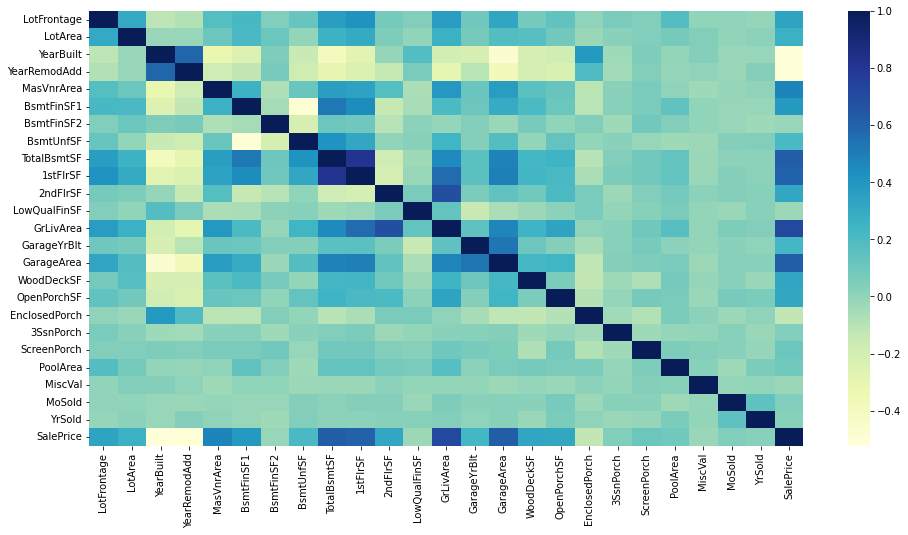

In [44]:
# plotting correlations heatmap

plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=False)
plt.show()

## 4. Data prep for modelling

In [45]:
list_numerical_features

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [46]:
df_categorical_features_final = df.select_dtypes(include=['object'])
final_categorical_features = list(df_categorical_features_final.columns)
print(len(final_categorical_features))
print(final_categorical_features)

41
['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'Fence', 'SaleType', 'SaleCondition']


In [47]:
# Creating dummies for all categorical features
for col in final_categorical_features:
    df_dummies = pd.get_dummies(df[col], drop_first = True)
    df_dummies = df_dummies.add_prefix(f'{col}_')
    # Adding the results to the original dataframe
    df = pd.concat([df, df_dummies], axis = 1)
    # Dropping the original categorical columns after dummy encoding completion.
    df.drop([col], axis = 1, inplace = True)

df.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,

In [48]:
# Removing outliers
z_score = np.abs(stats.zscore(df[list_numerical_features]))
records_without_outliers = df[list_numerical_features][(z_score < 3).all(axis=1)]
df = df.loc[records_without_outliers.index].copy()
df.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,

In [49]:
X = df.drop('SalePrice',axis=1)
y = np.log(df['SalePrice'])

In [50]:
# Splitting into train set and test set of ratio 70:30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=100)

## 5. Model Building

Performing Ridge Regression

In [53]:
# alphas to choose and tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# with cross validation
folds = 5
ridge_model = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1,n_jobs=-1)            
ridge_model.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [54]:
grid_search_cv_results = pd.DataFrame(ridge_model.cv_results_)
grid_search_cv_results = grid_search_cv_results[grid_search_cv_results['param_alpha']<=200]
grid_search_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.040346,0.018400,0.007341,0.001949,0.0001,{'alpha': 0.0001},-0.087105,-0.074592,-0.076804,-0.084543,-0.087276,-0.082064,0.005333,25,-0.047151,-0.049893,-0.048728,-0.047859,-0.048523,-0.048431,0.000917
1,0.018170,0.000343,0.007473,0.000223,0.001,{'alpha': 0.001},-0.086997,-0.074545,-0.076778,-0.084396,-0.087194,-0.081982,0.005302,24,-0.047157,-0.049894,-0.048734,-0.047869,-0.048536,-0.048438,0.000915
2,0.017291,0.000066,0.007284,0.000121,0.01,{'alpha': 0.01},-0.086053,-0.074156,-0.076651,-0.083193,-0.086463,-0.081303,0.005010,23,-0.047232,-0.049933,-0.048808,-0.047973,-0.048668,-0.048523,0.000901
3,0.017313,0.000160,0.007302,0.000120,0.05,{'alpha': 0.05},-0.083266,-0.073055,-0.076180,-0.080287,-0.084693,-0.079496,0.004344,21,-0.047536,-0.050167,-0.049144,-0.048378,-0.049062,-0.048857,0.000873
4,0.017190,0.000175,0.007324,0.000060,0.1,{'alpha': 0.1},-0.081664,-0.072270,-0.075469,-0.078391,-0.083530,-0.078265,0.004076,20,-0.047811,-0.050475,-0.049468,-0.048746,-0.049354,-0.049171,0.000878


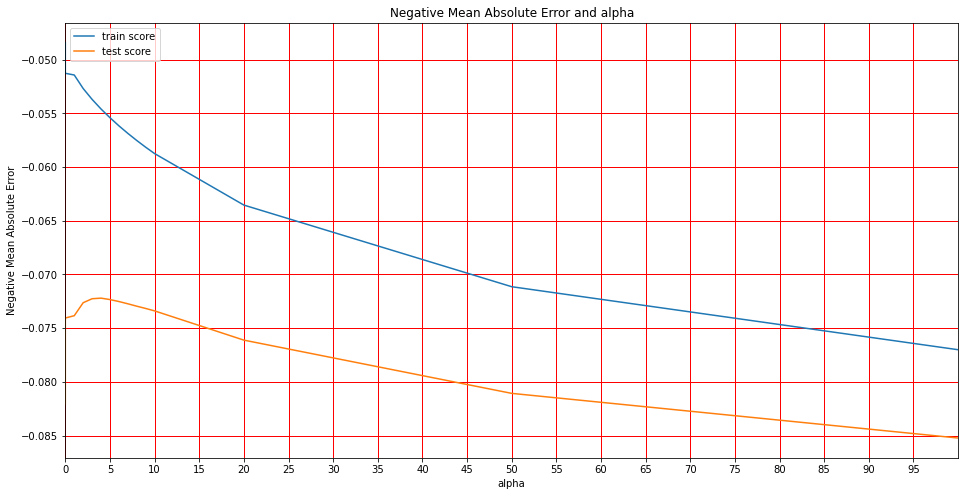

In [55]:
# plotting mean test and train scores with alpha 
grid_search_cv_results['param_alpha'] = grid_search_cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,8))
plt.plot(grid_search_cv_results['param_alpha'], grid_search_cv_results['mean_train_score'])
plt.plot(grid_search_cv_results['param_alpha'], grid_search_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 100)
plt.xticks(np.arange(0, 100, 5))
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

In [56]:
print('For Ridge Regression, best alpha value is = ', ridge_model.best_params_['alpha'])

For Ridge Regression, best alpha value is =  4.0


In [57]:
ridge = Ridge(alpha=4.0)
ridge.fit(X_train, y_train)


y_train_pred = ridge.predict(X_train)

print(f'train set r2 scores are\n{metrics.r2_score(y_true=y_train, y_pred=y_train_pred)}')

y_test_pred_ridge = ridge.predict(X_test)
print(f'test set r2 scores are\n{metrics.r2_score(y_true=y_test, y_pred=y_test_pred_ridge)}')


train set r2 scores are
0.9499935380174211
test set r2 scores are
0.8813714867247622


In [58]:
ridge_model_parameter = list(ridge.coef_)
ridge_model_parameter.insert(0,ridge.intercept_)

col = X_train.columns
col = col.insert(0,'Constant')
ridge_features_df = pd.DataFrame(zip(col,ridge_model_parameter), columns=['model-features', 'ridge_model_parameter'])
ridge_features_df.sort_values(by=['ridge_model_parameter'], ascending=False, ignore_index=True, inplace=True)
ridge_features_df.head(6)

,model-features,ridge_model_parameter
0,Constant,11.284405
1,Neighborhood_Crawfor,0.131865
2,OverallQual_9,0.083600
3,OverallCond_9,0.080967
4,Neighborhood_StoneBr,0.073875
5,MSZoning_FV,0.071082


For double aplha values, evaluating the performance of the ridge model

In [59]:
ridge = Ridge(alpha=8.0)
ridge.fit(X_train, y_train)


y_train_pred_ridge = ridge.predict(X_train)

print(f'train set r2 scores are\n{metrics.r2_score(y_true=y_train, y_pred=y_train_pred_ridge)}')

y_test_pred_ridge = ridge.predict(X_test)
print(f'test set r2 scores are\n{metrics.r2_score(y_true=y_test, y_pred=y_test_pred_ridge)}')


train set r2 scores are
0.9456042903533023
test set r2 scores are
0.8805291731606664


In [60]:
ridge_model_parameter = list(ridge.coef_)
ridge_model_parameter.insert(0,ridge.intercept_)

col = X_train.columns
col = col.insert(0,'Constant')
ridge_features_df2 = pd.DataFrame(zip(col,ridge_model_parameter), columns=['model-features', 'ridge_model_parameter'])
ridge_features_df2.sort_values(by=['ridge_model_parameter'], ascending=False, ignore_index=True, inplace=True)
ridge_features_df2.head(6)

,model-features,ridge_model_parameter
0,Constant,11.291331
1,Neighborhood_Crawfor,0.114214
2,OverallQual_9,0.070371
3,OverallCond_9,0.063888
4,Exterior1st_BrkFace,0.060335
5,Neighborhood_StoneBr,0.059209


Lasso regression

In [61]:
lasso = Lasso()

# cross validation
lasso_model = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1, n_jobs= -1)            

lasso_model.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [62]:
lasso_cv_results = pd.DataFrame(lasso_model.cv_results_)
lasso_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.187468,0.050230,0.007995,0.000530,0.0001,{'alpha': 0.0001},-0.077187,-0.067884,-0.070152,-0.072136,-0.078272,-0.073126,0.004007,1,-0.050263,-0.053564,-0.052201,-0.051403,-0.051019,-0.051690,0.001126
1,0.041983,0.007963,0.007708,0.000466,0.001,{'alpha': 0.001},-0.083292,-0.068999,-0.070108,-0.073324,-0.075976,-0.074340,0.005104,2,-0.061631,-0.065357,-0.064667,-0.063775,-0.064693,-0.064025,0.001298
2,0.018410,0.000976,0.007626,0.000225,0.01,{'alpha': 0.01},-0.105438,-0.089574,-0.099044,-0.098658,-0.099057,-0.098354,0.005066,3,-0.093156,-0.096850,-0.094843,-0.094150,-0.092858,-0.094371,0.001427
3,0.056511,0.003932,0.007686,0.000450,0.05,{'alpha': 0.05},-0.109246,-0.090965,-0.102712,-0.099859,-0.101789,-0.100914,0.005891,5,-0.095563,-0.100608,-0.096918,-0.097753,-0.097426,-0.097654,0.001656
4,0.085998,0.007670,0.007781,0.000479,0.1,{'alpha': 0.1},-0.109513,-0.091034,-0.103413,-0.098622,-0.101445,-0.100805,0.006054,4,-0.095736,-0.100712,-0.097104,-0.097867,-0.097541,-0.097792,0.001631


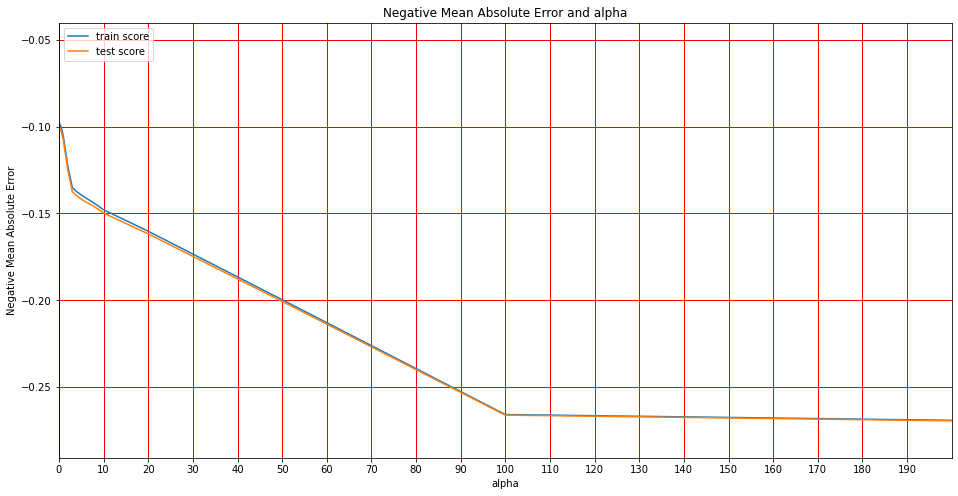

In [63]:
# plotting mean test and train scoes with alpha 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 200)
plt.xticks(np.arange(0, 200, 10))
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

In [64]:
print('For lasso, the best alpha value is = ', lasso_model.best_params_['alpha'])

For lasso, the best alpha value is =  0.0001


In [65]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train, y_train) 

# predict
y_train_pred_lasso = lasso.predict(X_train)

print(f'train set r2 scores are\n{metrics.r2_score(y_true=y_train, y_pred=y_train_pred_lasso)}')

y_test_pred_lasso = lasso.predict(X_test)

print(f'train set r2 scores are\n{metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso)}')

train set r2 scores are
0.9538119694108942
train set r2 scores are
0.8841668579392449


In [66]:
# lasso model parameters
lasso_model_parameters = list(lasso.coef_)
lasso_model_parameters.insert(0, lasso.intercept_)

cols = X_train.columns
cols = cols.insert(0, "constant")


list(zip(lasso_model_parameters,cols))

lasso_features_df = pd.DataFrame(zip(cols,lasso_model_parameters), columns=['model-features','lasso_model_parameter'])
lasso_features_df.sort_values(by=['lasso_model_parameter'], ascending=False, ignore_index=True, inplace=True)
lasso_features_df.head(6)

,model-features,lasso_model_parameter
0,constant,11.140204
1,MSZoning_FV,0.203357
2,OverallQual_10,0.179130
3,Neighborhood_Crawfor,0.169172
4,MSZoning_RL,0.140431
5,OverallQual_9,0.138407


For double aplha values, evaluating the performance of the ridge model

In [67]:
lasso = Lasso(alpha=0.0002)
lasso.fit(X_train, y_train) 

# predict
y_train_pred_lasso = lasso.predict(X_train)

print(f'train set r2 scores are\n{metrics.r2_score(y_true=y_train, y_pred=y_train_pred_lasso)}')

y_test_pred_lasso = lasso.predict(X_test)

print(f'train set r2 scores are\n{metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso)}')

train set r2 scores are
0.9502749760147746
train set r2 scores are
0.8822650154732443


In [68]:
# lasso model parameters
lasso_model_parameters = list(lasso.coef_)
lasso_model_parameters.insert(0, lasso.intercept_)

cols = X_train.columns
cols = cols.insert(0, "constant")


list(zip(lasso_model_parameters,cols))

lasso_features_df2 = pd.DataFrame(zip(cols,lasso_model_parameters), columns=['model-features','lasso_model_parameter'])
lasso_features_df2.sort_values(by=['lasso_model_parameter'], ascending=False, ignore_index=True, inplace=True)
lasso_features_df2.head(6)

,model-features,lasso_model_parameter
0,constant,11.230378
1,Neighborhood_Crawfor,0.168212
2,OverallQual_10,0.157125
3,OverallQual_9,0.136245
4,KitchenAbvGr_1,0.105050
5,OverallCond_9,0.099971


Answer to subjective question 3, new model excluding the previous top 5 features

In [75]:
old_top_5_features = ['MSZoning_FV','OverallQual_10','Neighborhood_Crawfor','MSZoning_RL','OverallQual_10']

In [78]:
X_train_mod = X_train.drop(old_top_5_features, axis=1)

In [79]:
X_test_mod = X_test.drop(old_top_5_features, axis=1)

In [80]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train_mod, y_train) 

# predict
y_train_pred_lasso = lasso.predict(X_train_mod)

print(f'train set r2 scores are\n{metrics.r2_score(y_true=y_train, y_pred=y_train_pred_lasso)}')

y_test_pred_lasso = lasso.predict(X_test_mod)

print(f'train set r2 scores are\n{metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso)}')

train set r2 scores are
0.9511283150076493
train set r2 scores are
0.8788245401969829


In [81]:
# lasso model parameters
lasso_model_parameters = list(lasso.coef_)
lasso_model_parameters.insert(0, lasso.intercept_)

cols = X_train.columns
cols = cols.insert(0, "constant")


list(zip(lasso_model_parameters,cols))

lasso_features_df_new = pd.DataFrame(zip(cols,lasso_model_parameters), columns=['model-features','lasso_model_parameter'])
lasso_features_df_new.sort_values(by=['lasso_model_parameter'], ascending=False, ignore_index=True, inplace=True)
lasso_features_df_new.head(6)

,model-features,lasso_model_parameter
0,constant,11.354247
1,RoofStyle_Mansard,0.103756
2,Condition1_Feedr,0.097312
3,BedroomAbvGr_4,0.095982
4,OverallCond_5,0.092663
5,BsmtQual_TA,0.076491


## 6. Conclusion

In [83]:
lasso_features_df.head(11)

,model-features,lasso_model_parameter
0,constant,11.140204
1,MSZoning_FV,0.203357
2,OverallQual_10,0.179130
3,Neighborhood_Crawfor,0.169172
4,MSZoning_RL,0.140431
5,OverallQual_9,0.138407
6,MSZoning_RM,0.115655
7,MSZoning_RH,0.112253
8,KitchenAbvGr_1,0.103929
9,OverallCond_9,0.100731
